## QFT para n qubits

Os estados que serão preparados inicialmente são:

$$\vert \psi \rangle =  \vert 000...0 \rangle_n$$


$$\vert \psi \rangle =  \vert 111...1 \rangle_n$$


$$\vert \psi \rangle = \left [ \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}} \right ]^{\otimes n}$$


$$\vert \psi \rangle = \frac{\vert 0 \rangle^{\otimes n} + \vert 1 \rangle^{\otimes n}}{\sqrt{2}}$$


$$\vert \psi \rangle = \mbox{estado aleatório de n qubits}$$

## Sumário:
* [Criando os circuitos](#first-bullet)
* [Simulação Artificial (computador clássico)](#second-bullet)
* [Testando a variação no número de shots](#21-bullet)
* [Simulação Remota (computador quântico)](#third-bullet)
* [QFT inversa](#fourth-bullet)

In [1]:
#------------------------------------------------------------------------
# FUNCAO QUE MONTA O CIRCUITO DA QFT DE 'n' QUBITS:
#------------------------------------------------------------------------
def QFT(n, Changing_initial_state):
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit;
#------------------------------
    Q  = QuantumRegister(  n, name = 'j');
    C  = ClassicalRegister(n, name = 'c');
    QC = QuantumCircuit(Q, C, name = "QFT");
#------------------------------
#PREPARAÇÃO DO ESTADO INCIAL
#------------------------------     
    if Changing_initial_state == 0: # |00...0>
        None
    if Changing_initial_state == 1: # |11...1>
        for p in range(0,n):
            QC.x(Q[p]) # <-- PORTA 'X' NO QUBIT p
        QC.barrier()
    if Changing_initial_state == 2: # (|0>+|1>)_n
        for p in range(0,n):
            QC.h(Q[p]) # <-- PORTA 'H' NO QUBIT p
        QC.barrier()
    if Changing_initial_state == 3: # |11>
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT p
        for p in range(1,n):
            QC.cx(Q[0], Q[p])
        QC.barrier()
        #QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT p
        #for p in range(1,n):
            #QC.cx(Q[p-1], Q[p]) # <-- PORTA 'CNOT'
        #QC.barrier()
#------------------------------
#PREPARAÇÃO DO ESTADO INCIAL: ESTADO ALEATORIO
#------------------------------
    if Changing_initial_state == 4: 
        from qiskit.visualization import plot_state_qsphere
        from qiskit.quantum_info import Statevector, random_statevector
        psi_random = random_statevector(2**(n))
        QC.initialize(psi_random.data, [r for r in range(n)])
        QC.barrier()
#------------------------------
#APLICANDO A QFT
#------------------------------
    for i in range(0, n):
        m = n - 1 - i;
        QC.h(Q[m]);
        for j in range(m, 0, -1):
            k = 2 + m - j;
            Rk(QC, Q[j-1], Q[m], k, 1.0);
        QC.barrier();
#------------------------------
# PORTA SWAP:
#------------------------------
    j = 0;
    while ( int(n/2) > j ):
        QC.swap( Q[j], Q[n-1 - j] );
        j = j + 1;
#------------------------------
    QC.barrier();
    QC.measure(Q, C); print(' QFT(): FUNCIONA');
#------------------------------
    return QC;
#------------------------------------------------------------------------
# FUNCAO QUE DEFINE A PORTA Rk USANDO A PORTA cu1:
#------------------------------------------------------------------------
def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
    import math as MT; PI = MT.pi;
    QC.cu1( a*2.0*PI/2.0**k, Q_CONTROL, Q_TARGET);
    return None;

In [2]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA LOCAL:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer;
    from qiskit  import execute;
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\'';
    BACKEND = Aer.get_backend(BACKEND_NAME);
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- IMPRIMI UM MONTE DE COISAS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); <-- IMPRIMI UM MONTE DE COISAS
    print('   get_counts():', RESULT.get_counts() );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

## Criando os circuitos <a class="anchor" id="first-bullet"></a>

In [3]:
n = 2; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_20 = QFT(n,0);

 QFT(): FUNCIONA


<ipython-input-1-4b773eded7c6>:68: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  QC.cu1( a*2.0*PI/2.0**k, Q_CONTROL, Q_TARGET);


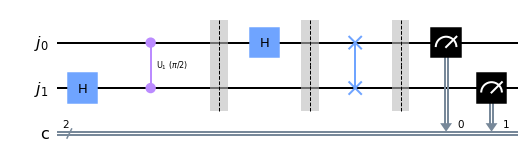

In [4]:
display( QC_QFT_20.draw(output='mpl'));

 QFT(): FUNCIONA


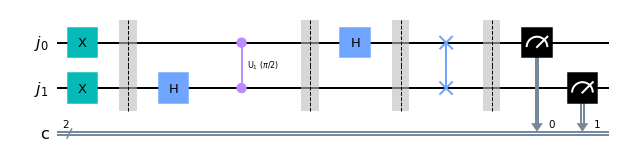

In [5]:
n = 2; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_21 = QFT(n,1);

display( QC_QFT_21.draw(output='mpl'));

 QFT(): FUNCIONA


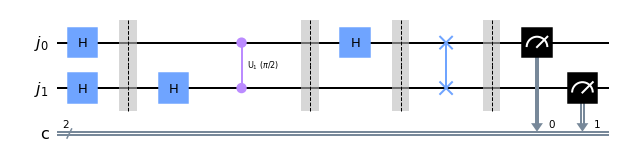

In [6]:
n = 2; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_22 = QFT(n,2);

display( QC_QFT_22.draw(output='mpl'));

 QFT(): FUNCIONA


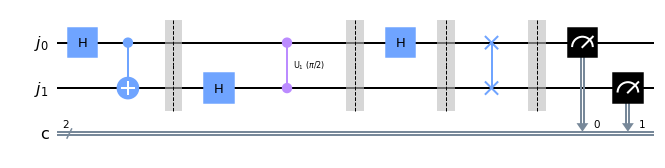

In [7]:
n = 2; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_23 = QFT(n,3);

display( QC_QFT_23.draw(output='mpl'));

 QFT(): FUNCIONA


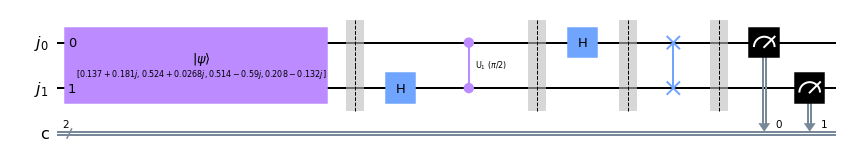

In [8]:
n = 2; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_24 = QFT(n,4);

display( QC_QFT_24.draw(output='mpl'));

 QFT(): FUNCIONA


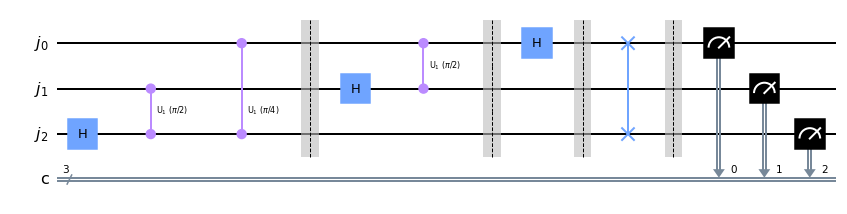

In [9]:
n = 3; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_30 = QFT(n,0);

display( QC_QFT_30.draw(output='mpl'));

 QFT(): FUNCIONA


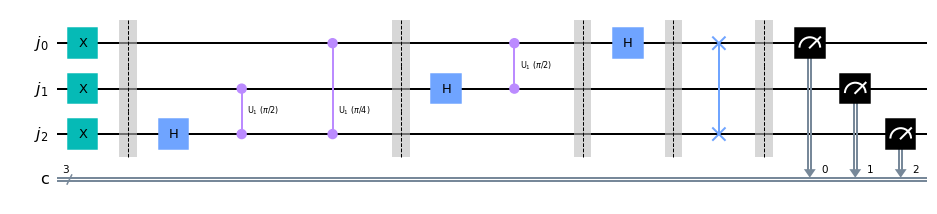

In [10]:
n = 3; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_31 = QFT(n,1);

display( QC_QFT_31.draw(output='mpl'));

 QFT(): FUNCIONA


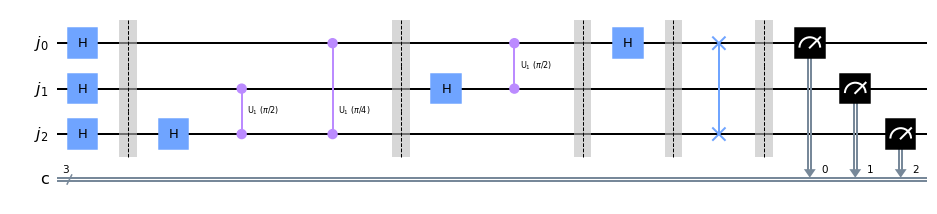

In [11]:
n = 3; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_32 = QFT(n,2);

display( QC_QFT_32.draw(output='mpl'));

 QFT(): FUNCIONA


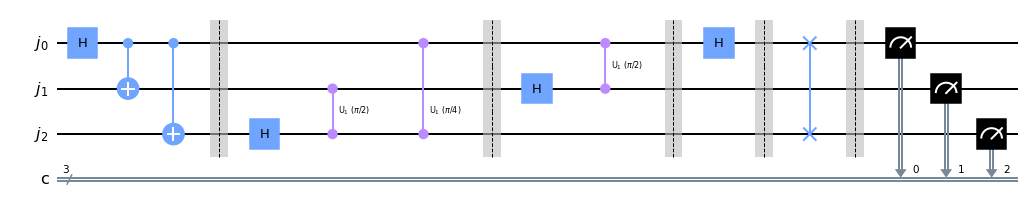

In [12]:
n = 3; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_33 = QFT(n,3);

display( QC_QFT_33.draw(output='mpl'));

 QFT(): FUNCIONA


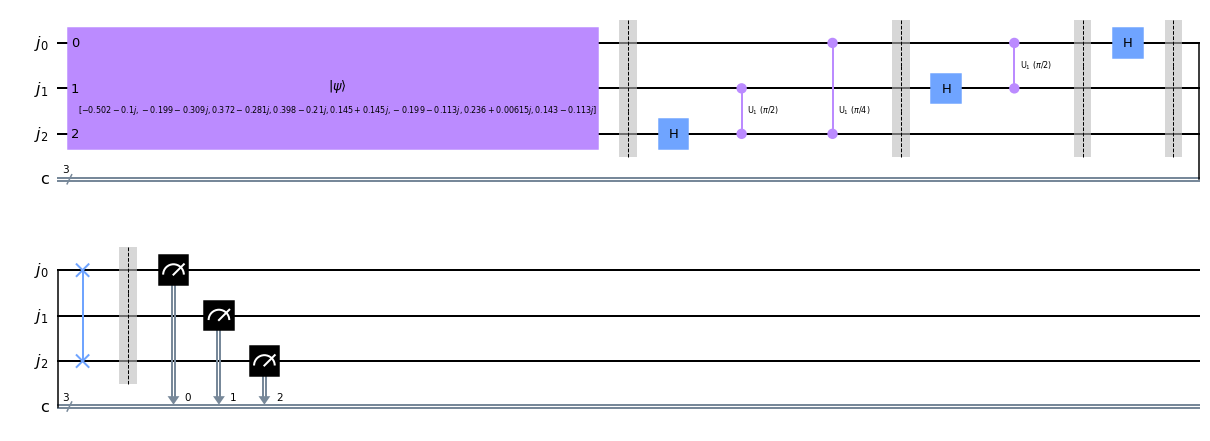

In [13]:
n = 3; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_34 = QFT(n,4);

display( QC_QFT_34.draw(output='mpl'));

 QFT(): FUNCIONA


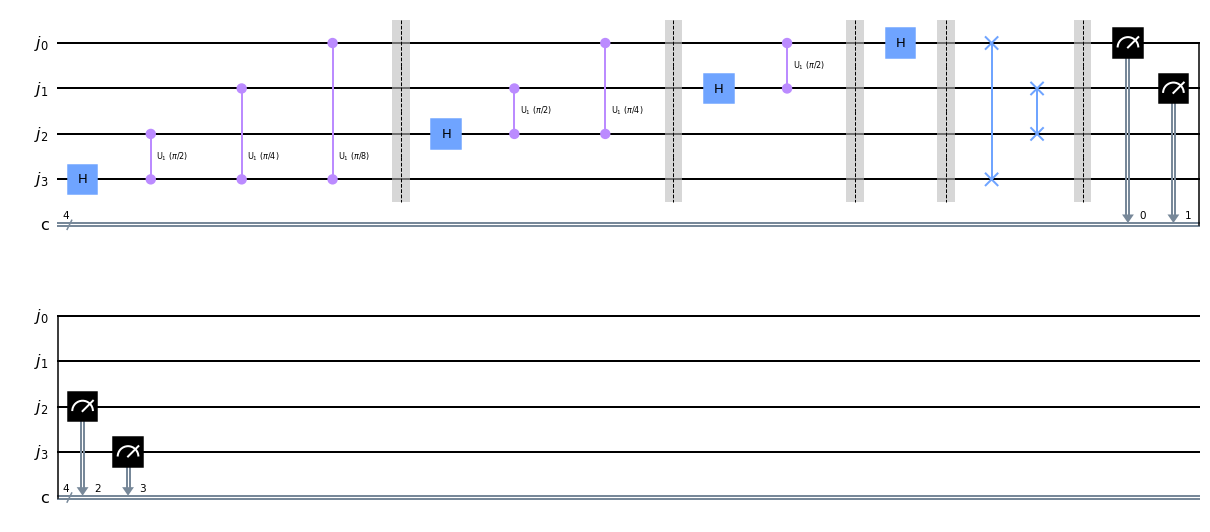

In [14]:
n = 4; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_40 = QFT(n,0);

display( QC_QFT_40.draw(output='mpl'));

 QFT(): FUNCIONA


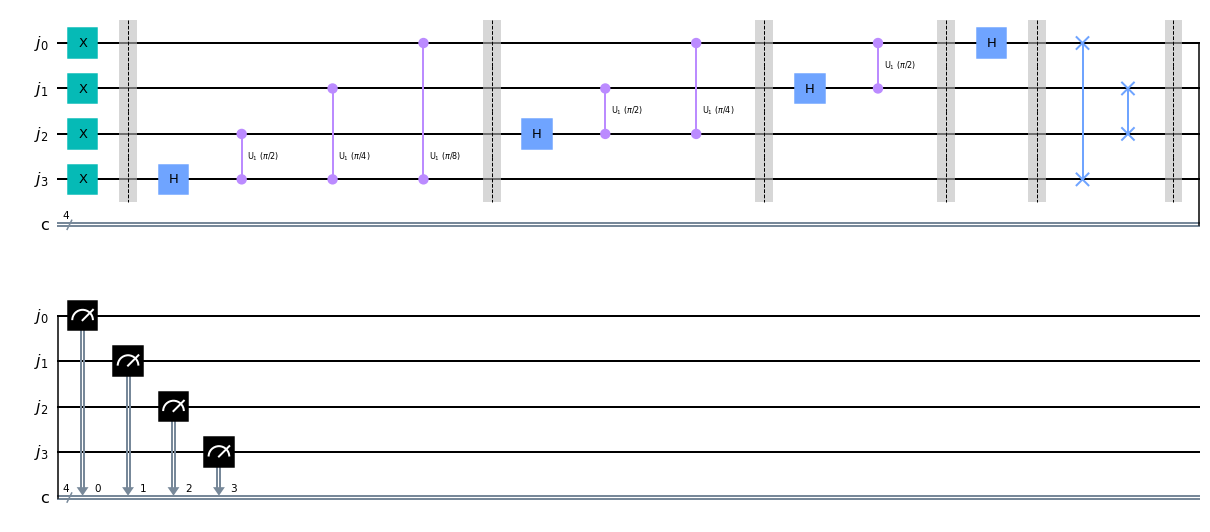

In [15]:
n = 4; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_41 = QFT(n,1);

display( QC_QFT_41.draw(output='mpl'));

 QFT(): FUNCIONA


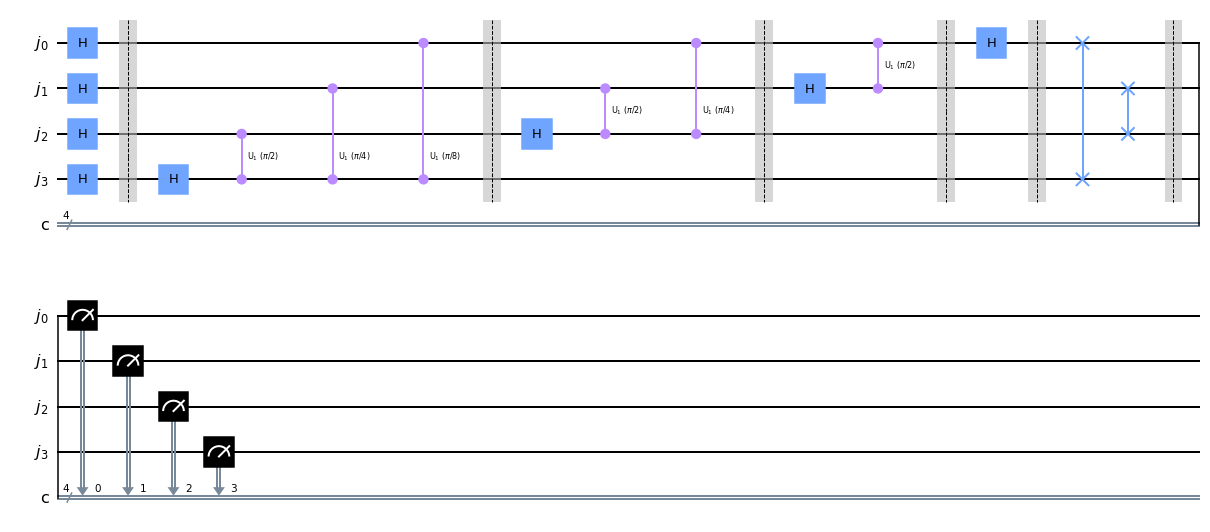

In [16]:
n = 4; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_42 = QFT(n,2);

display( QC_QFT_42.draw(output='mpl'));

 QFT(): FUNCIONA


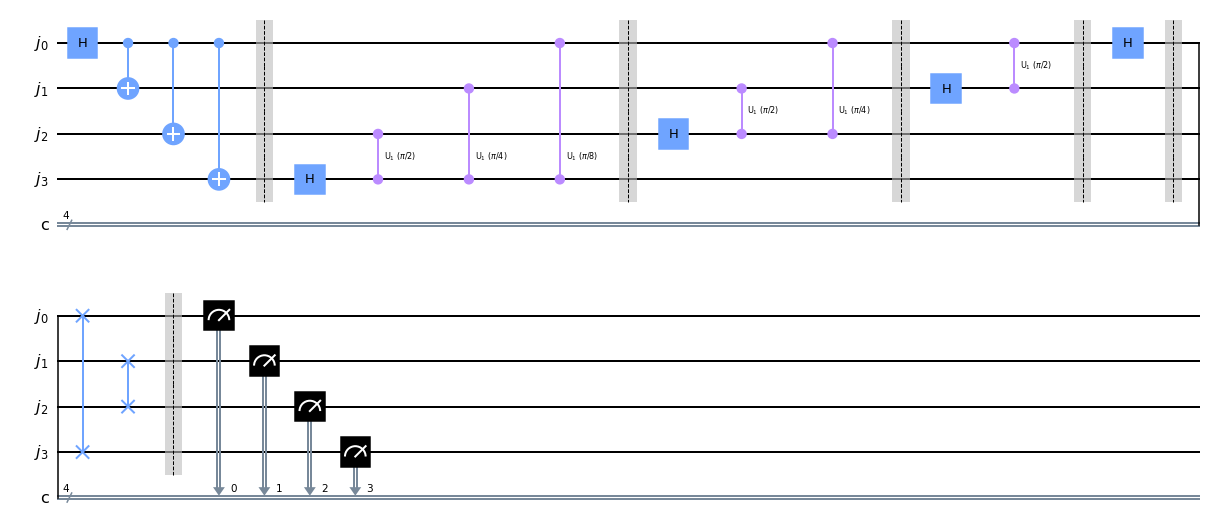

In [17]:
n = 4; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_43 = QFT(n,3);

display( QC_QFT_43.draw(output='mpl'));

 QFT(): FUNCIONA


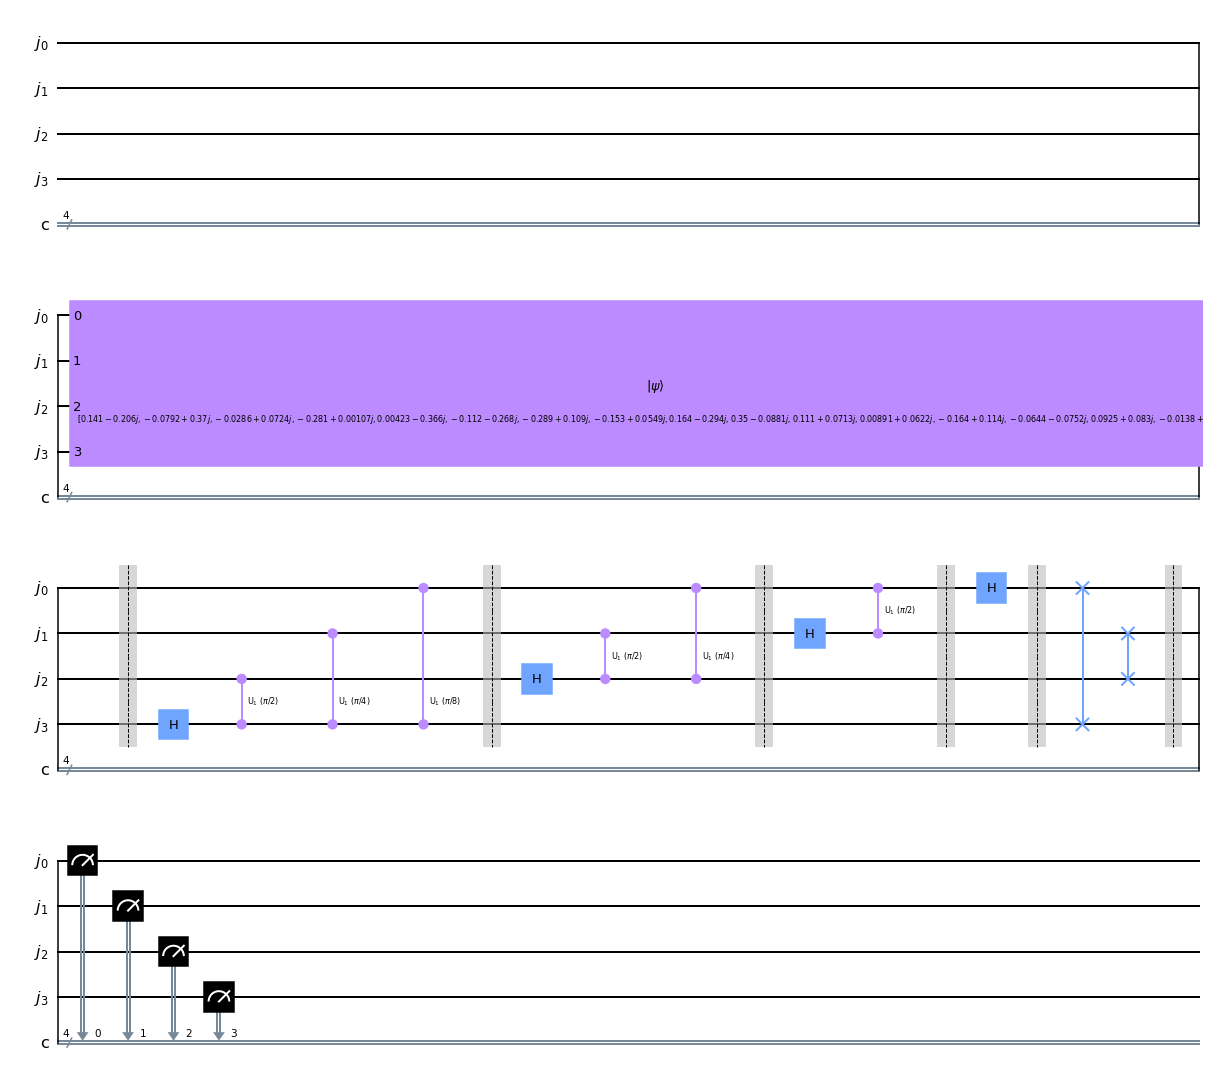

In [18]:
n = 4; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_44 = QFT(n,4);

display( QC_QFT_44.draw(output='mpl'));

 QFT(): FUNCIONA


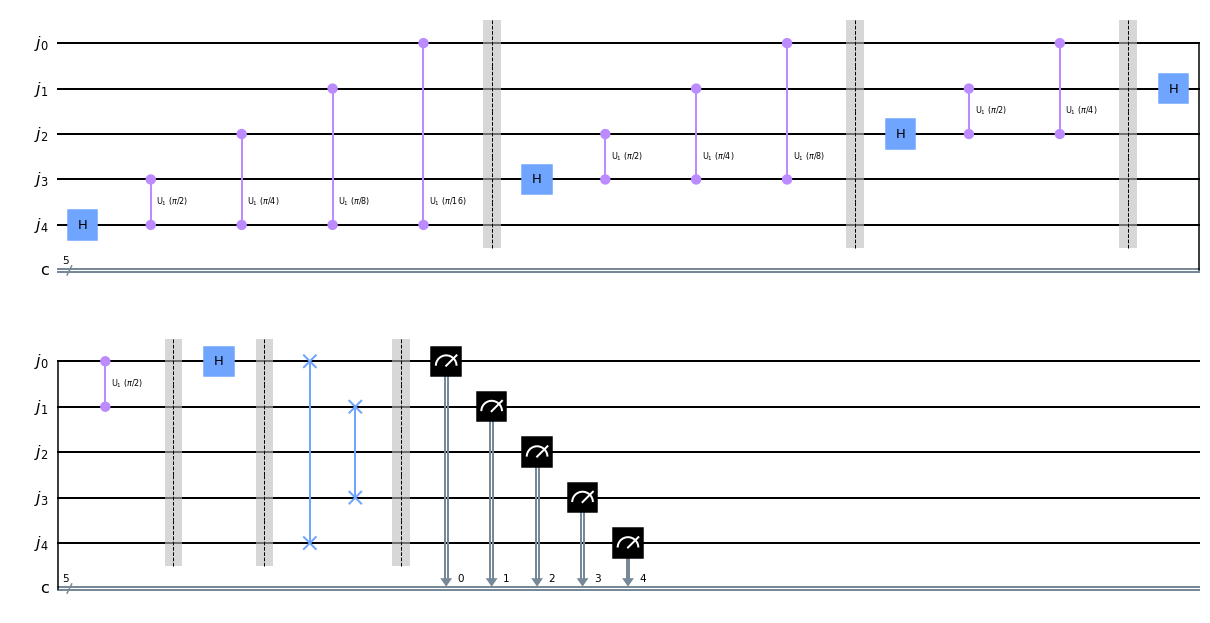

In [19]:
n = 5; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_50 = QFT(n,0);

display( QC_QFT_50.draw(output='mpl'));

 QFT(): FUNCIONA


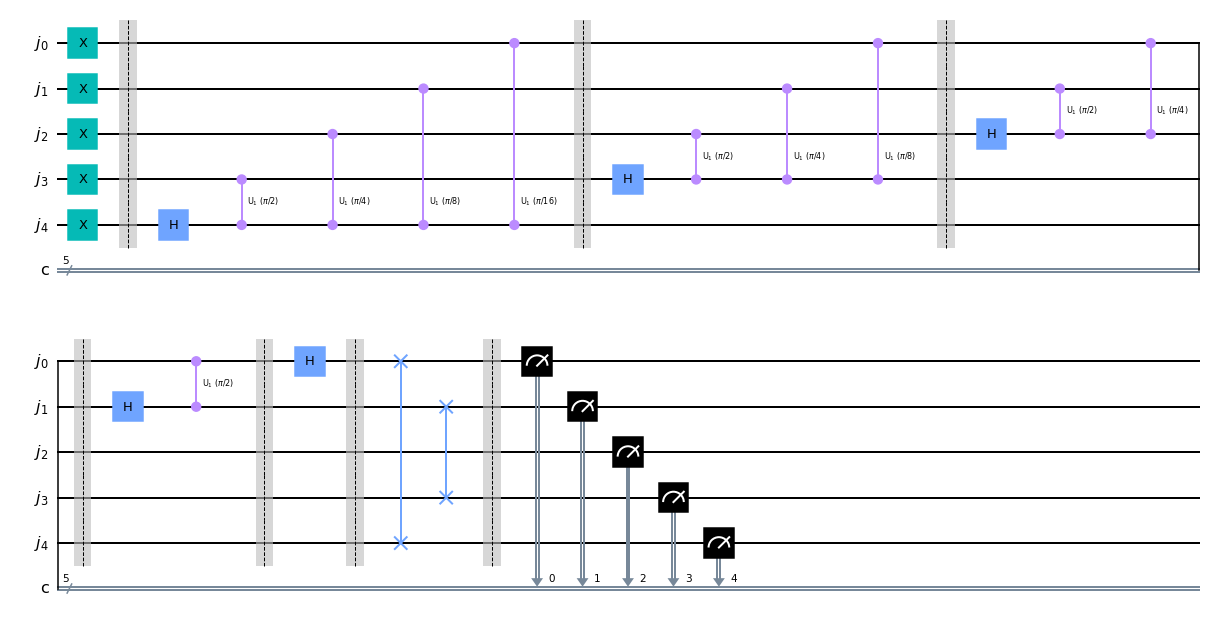

In [20]:
n = 5; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_51 = QFT(n,1);

display( QC_QFT_51.draw(output='mpl'));

 QFT(): FUNCIONA


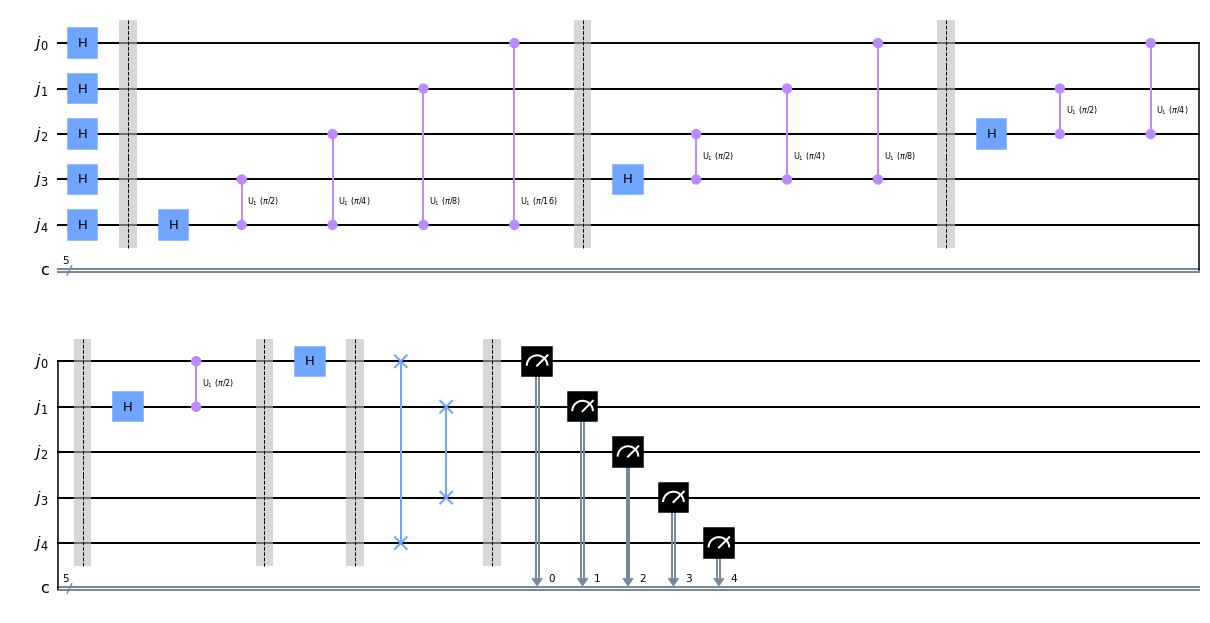

In [21]:
n = 5; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_52 = QFT(n,2);

display( QC_QFT_52.draw(output='mpl'));

 QFT(): FUNCIONA


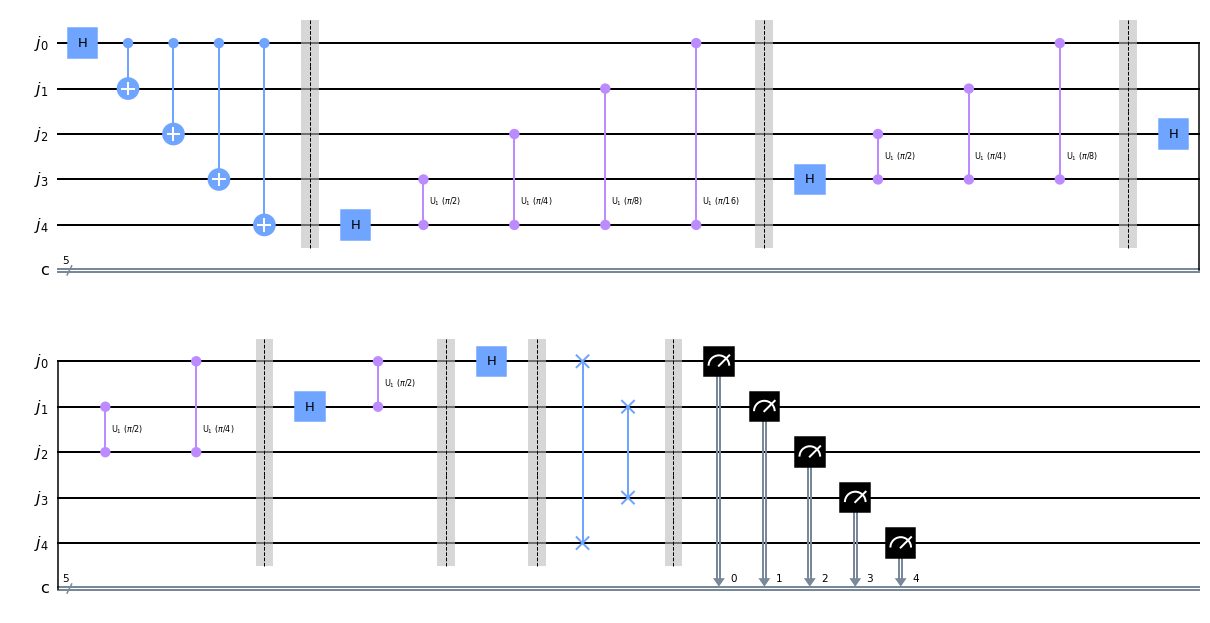

In [22]:
n = 5; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_53 = QFT(n,3);

display( QC_QFT_53.draw(output='mpl'));

 QFT(): FUNCIONA


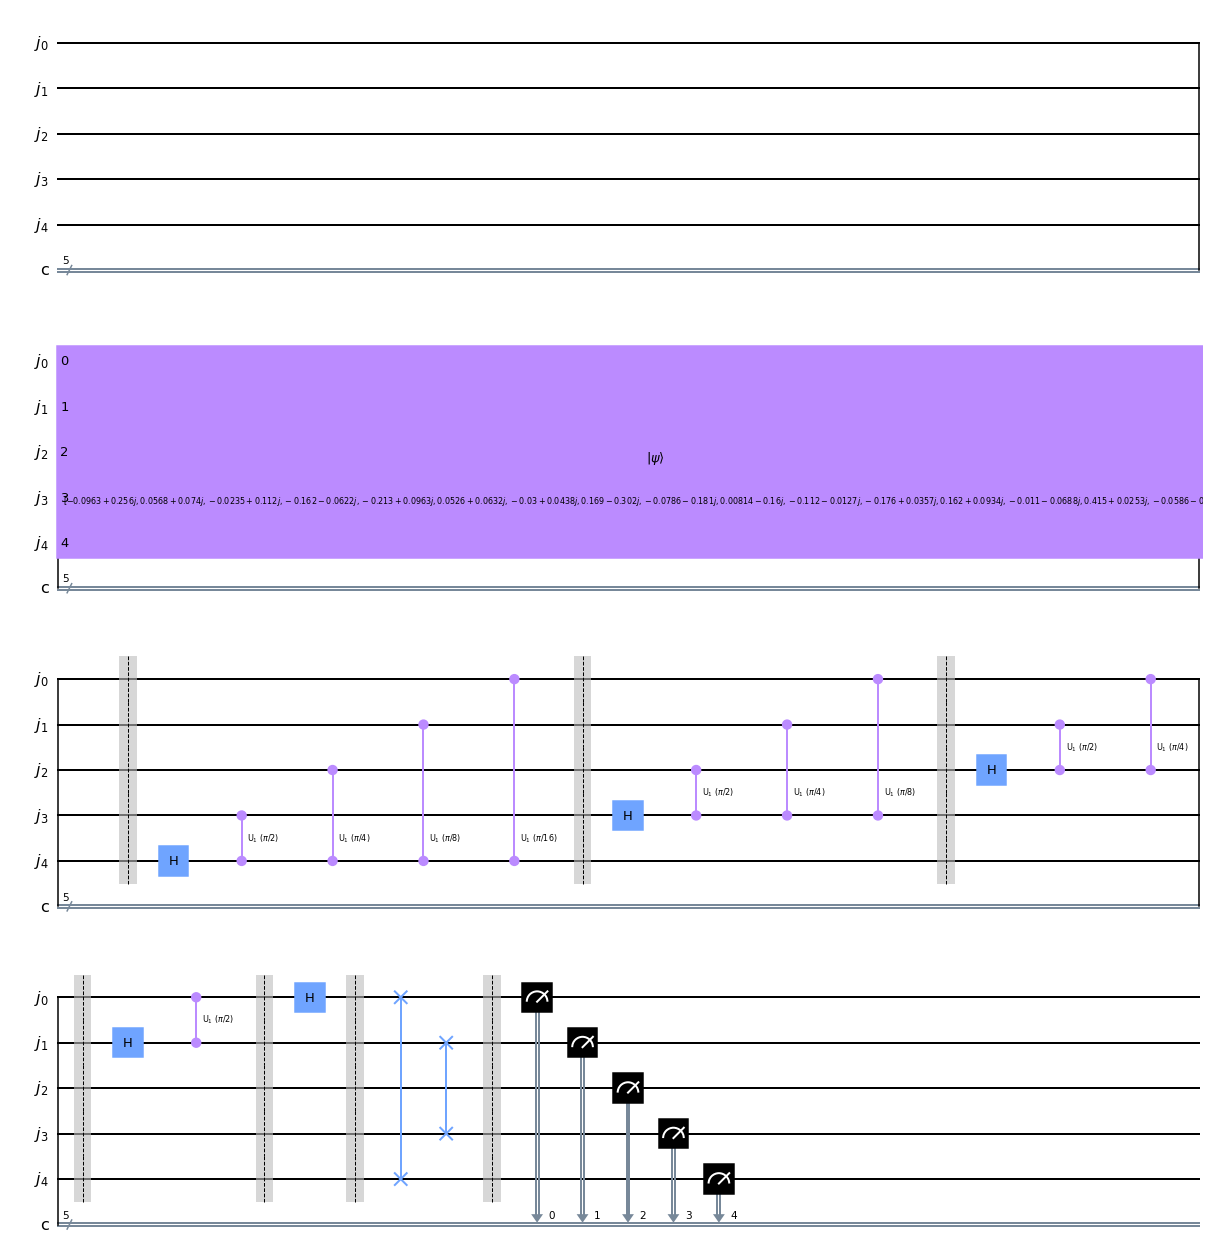

In [23]:
n = 5; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_54 = QFT(n,4);

display( QC_QFT_54.draw(output='mpl'));

 QFT(): FUNCIONA


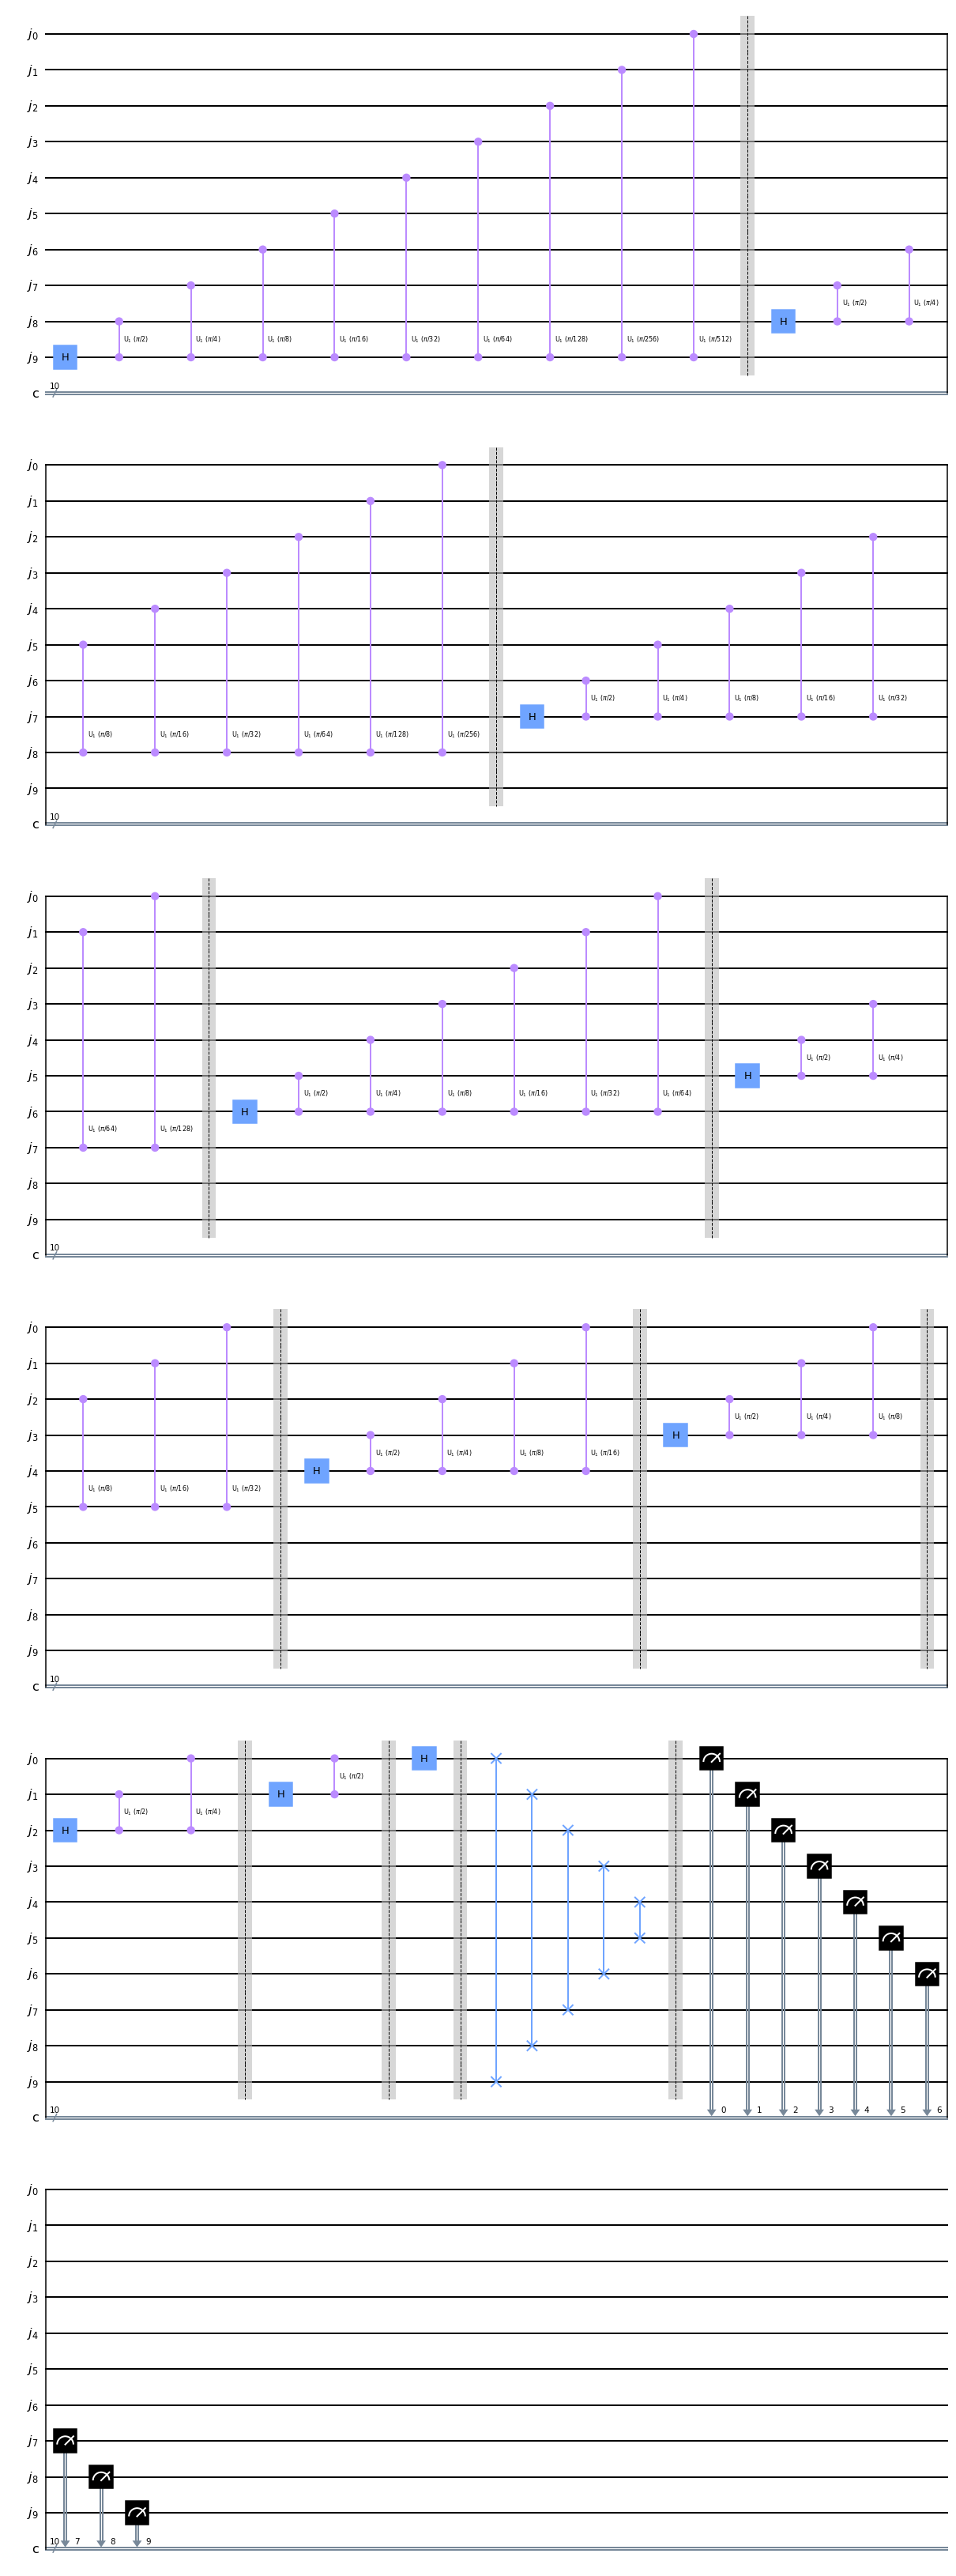

In [24]:
n = 10; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_100 = QFT(n,0);

display( QC_QFT_100.draw(output='mpl'));

 QFT(): FUNCIONA


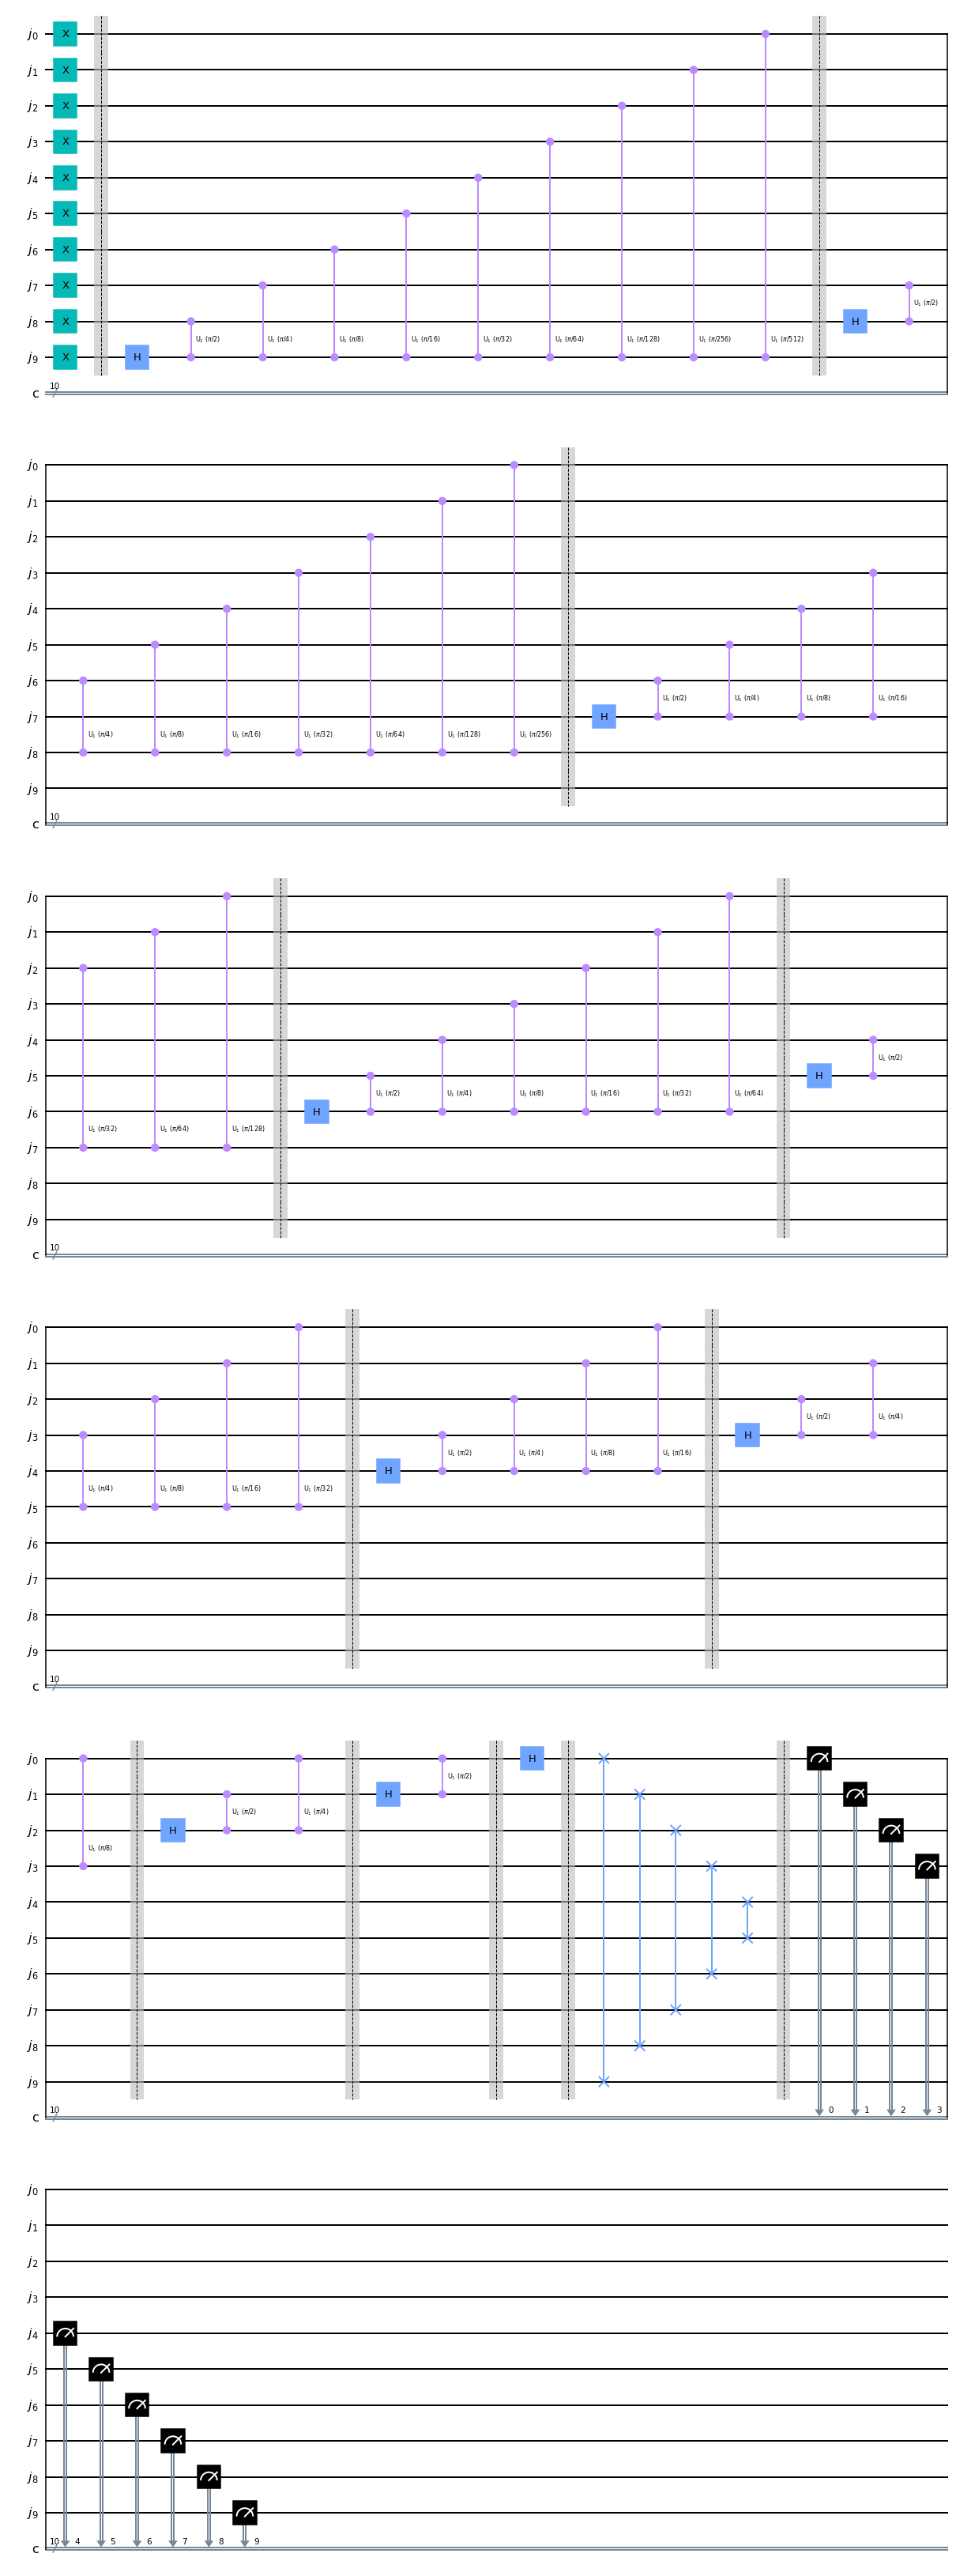

In [25]:
n = 10; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_101 = QFT(n,1);

display( QC_QFT_101.draw(output='mpl'));

 QFT(): FUNCIONA


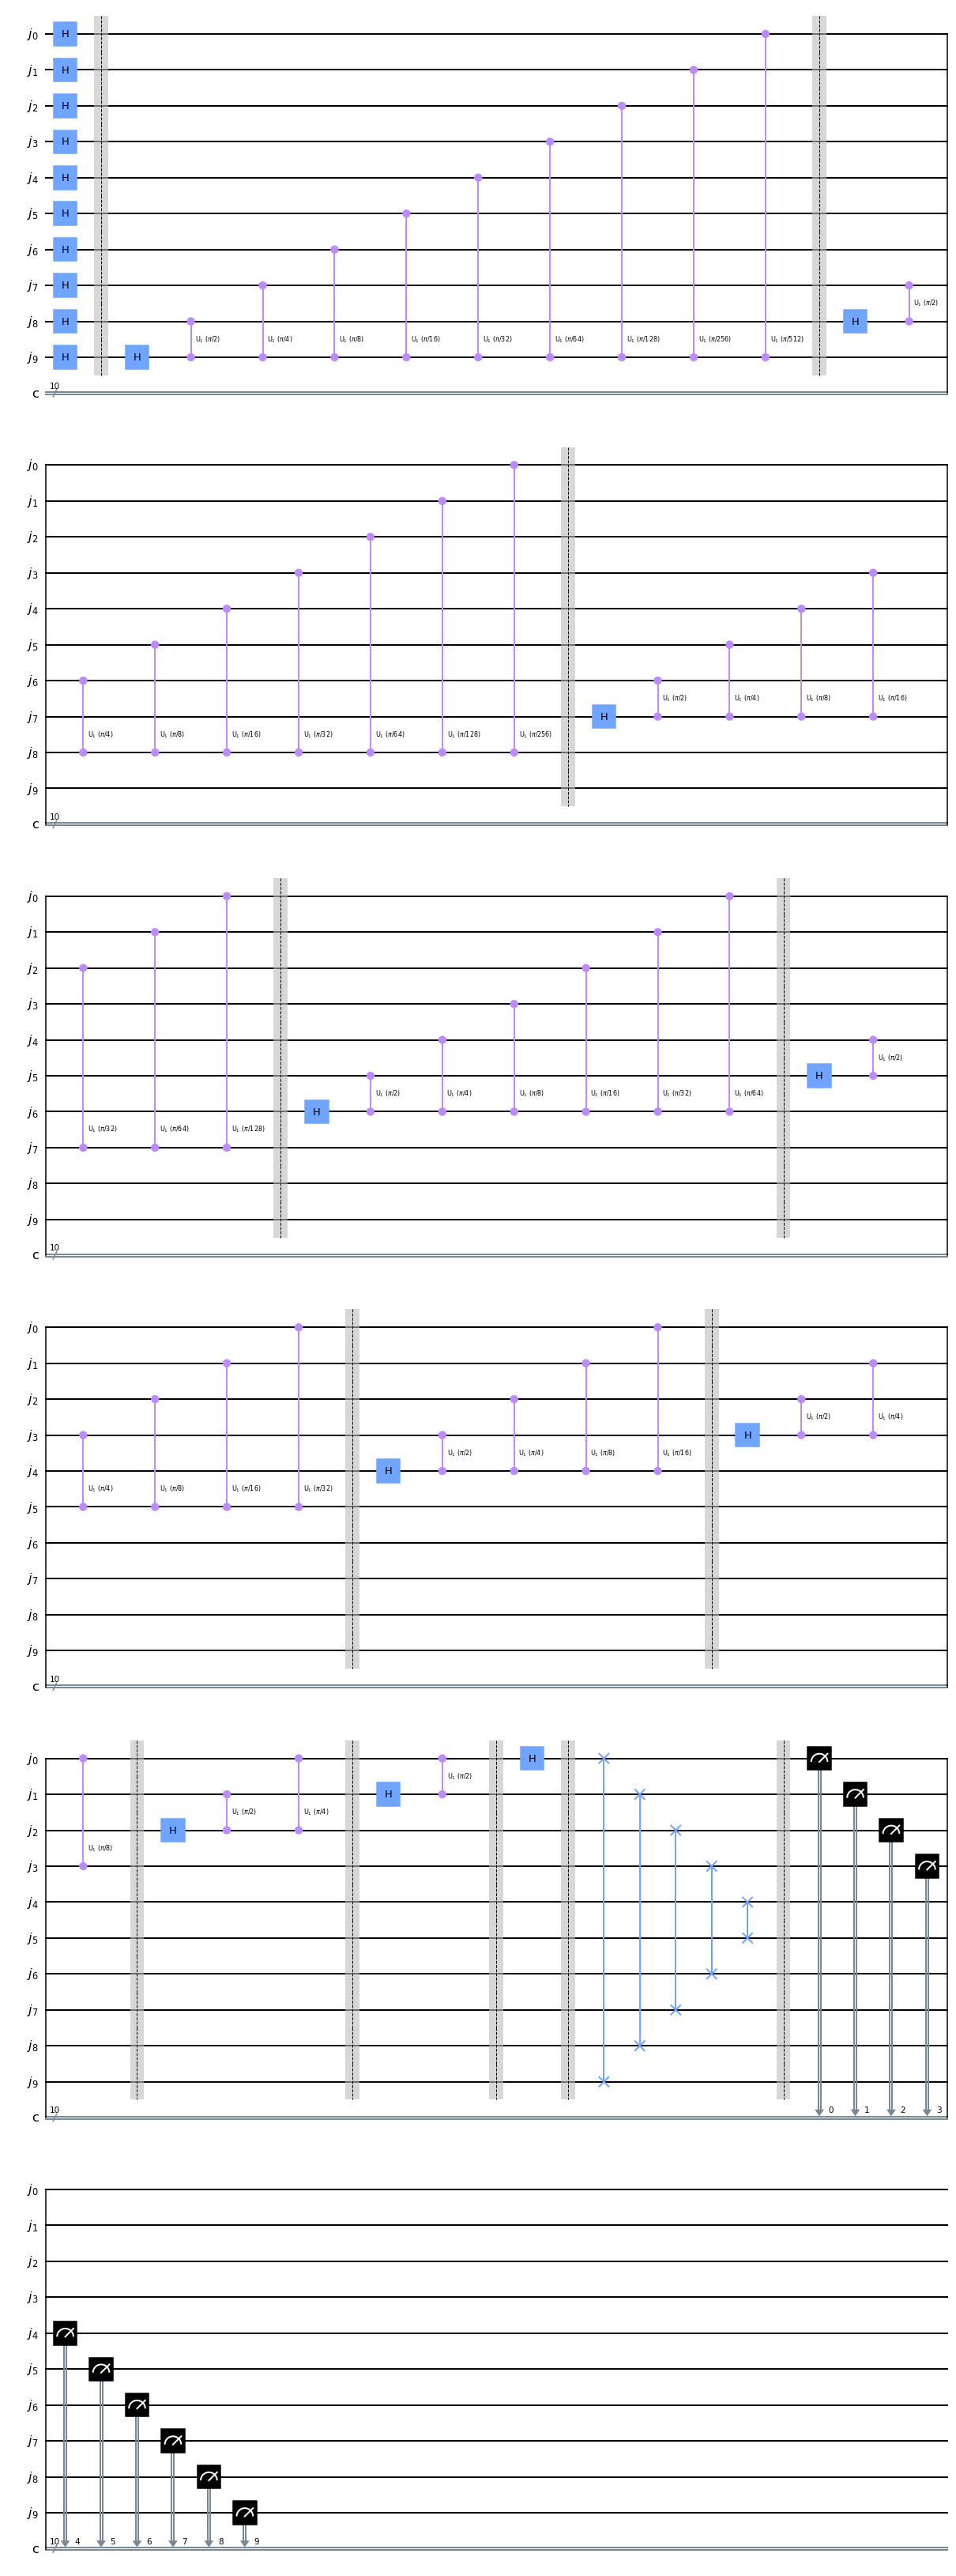

In [26]:
n = 10; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_102 = QFT(n,2);

display( QC_QFT_102.draw(output='mpl'));

 QFT(): FUNCIONA


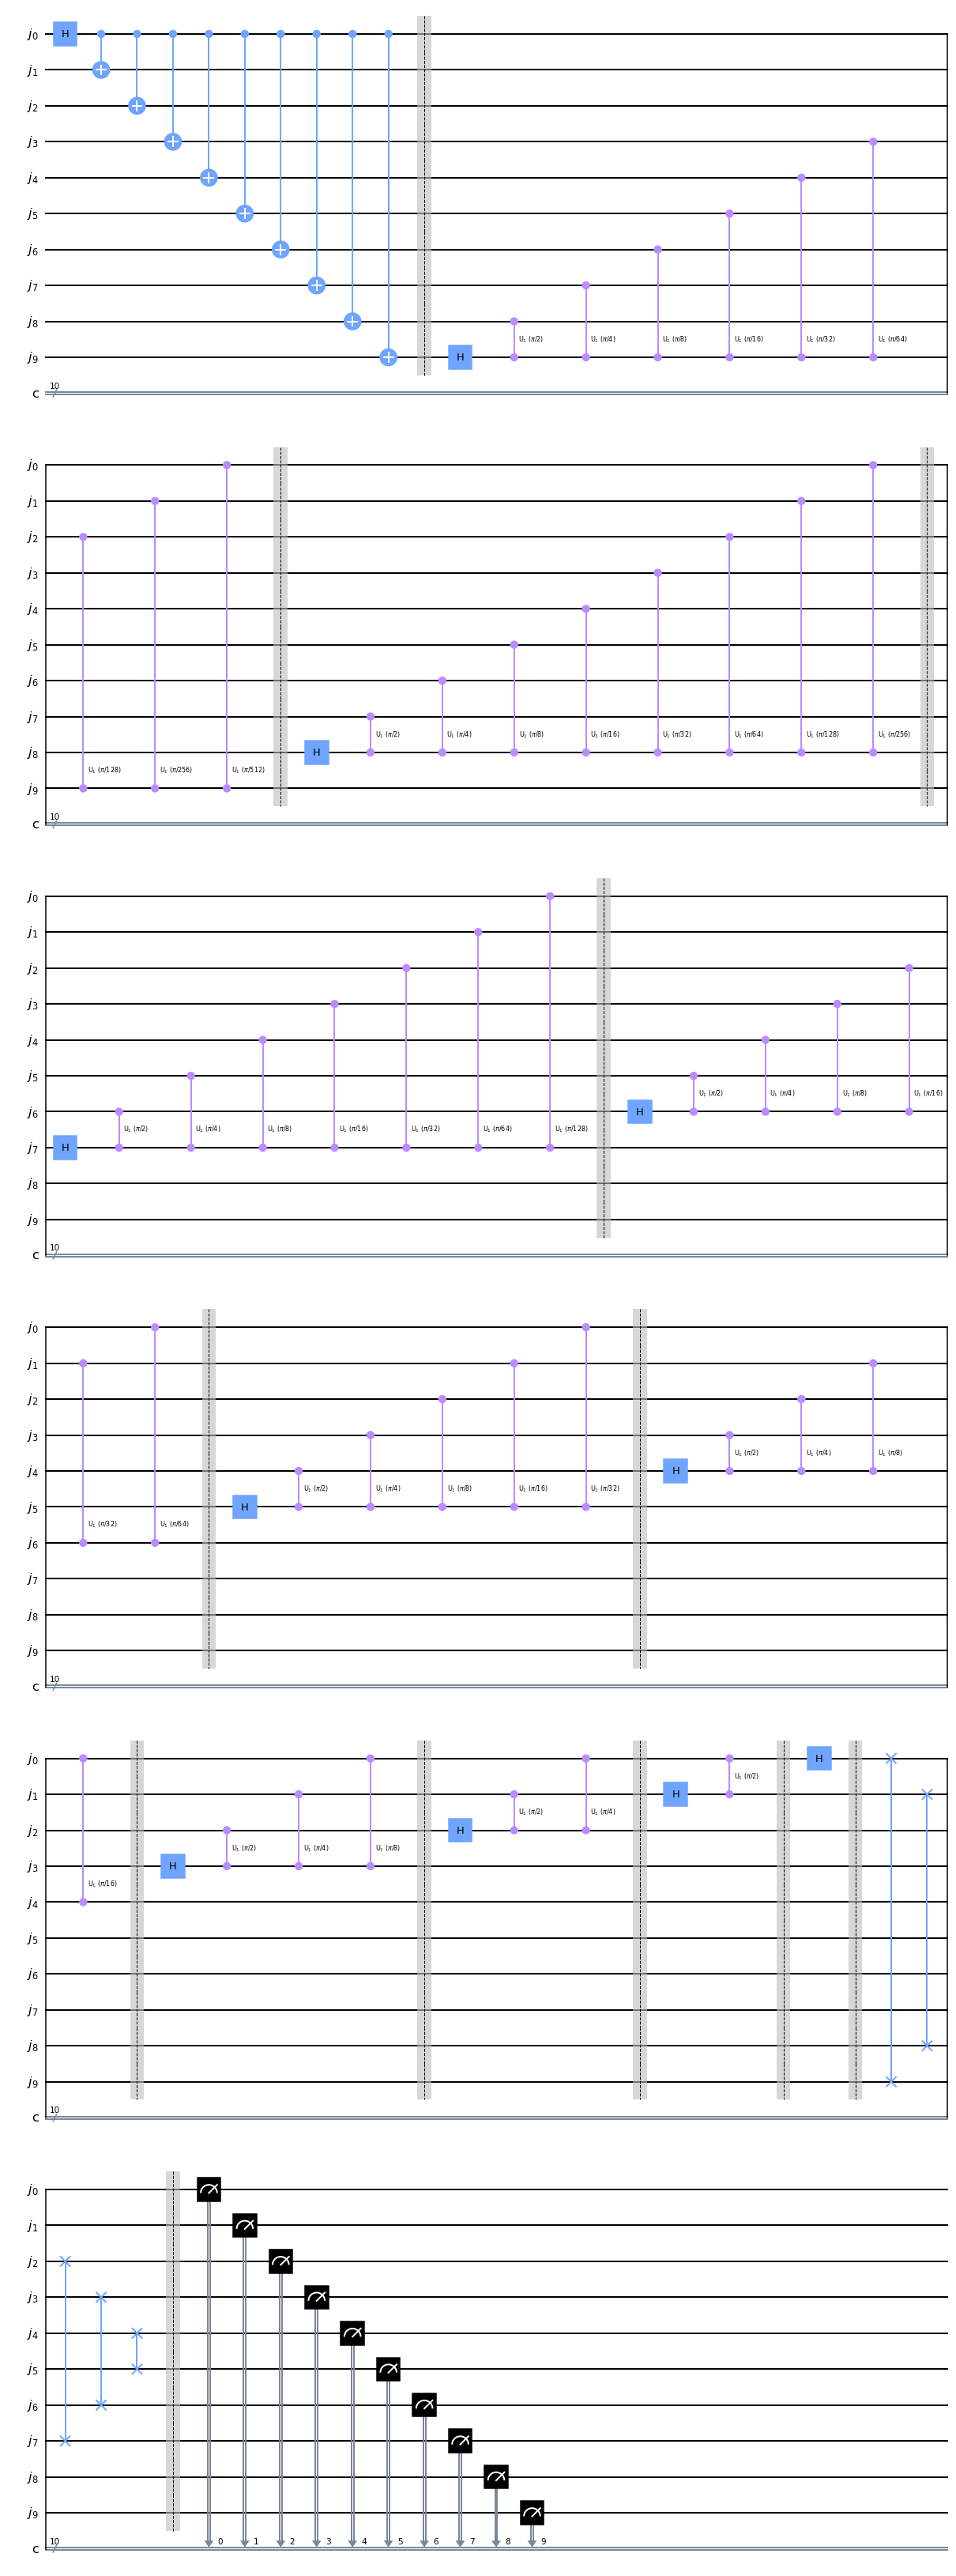

In [27]:
n = 10; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_103 = QFT(n,3);

display( QC_QFT_103.draw(output='mpl'));

 QFT(): FUNCIONA


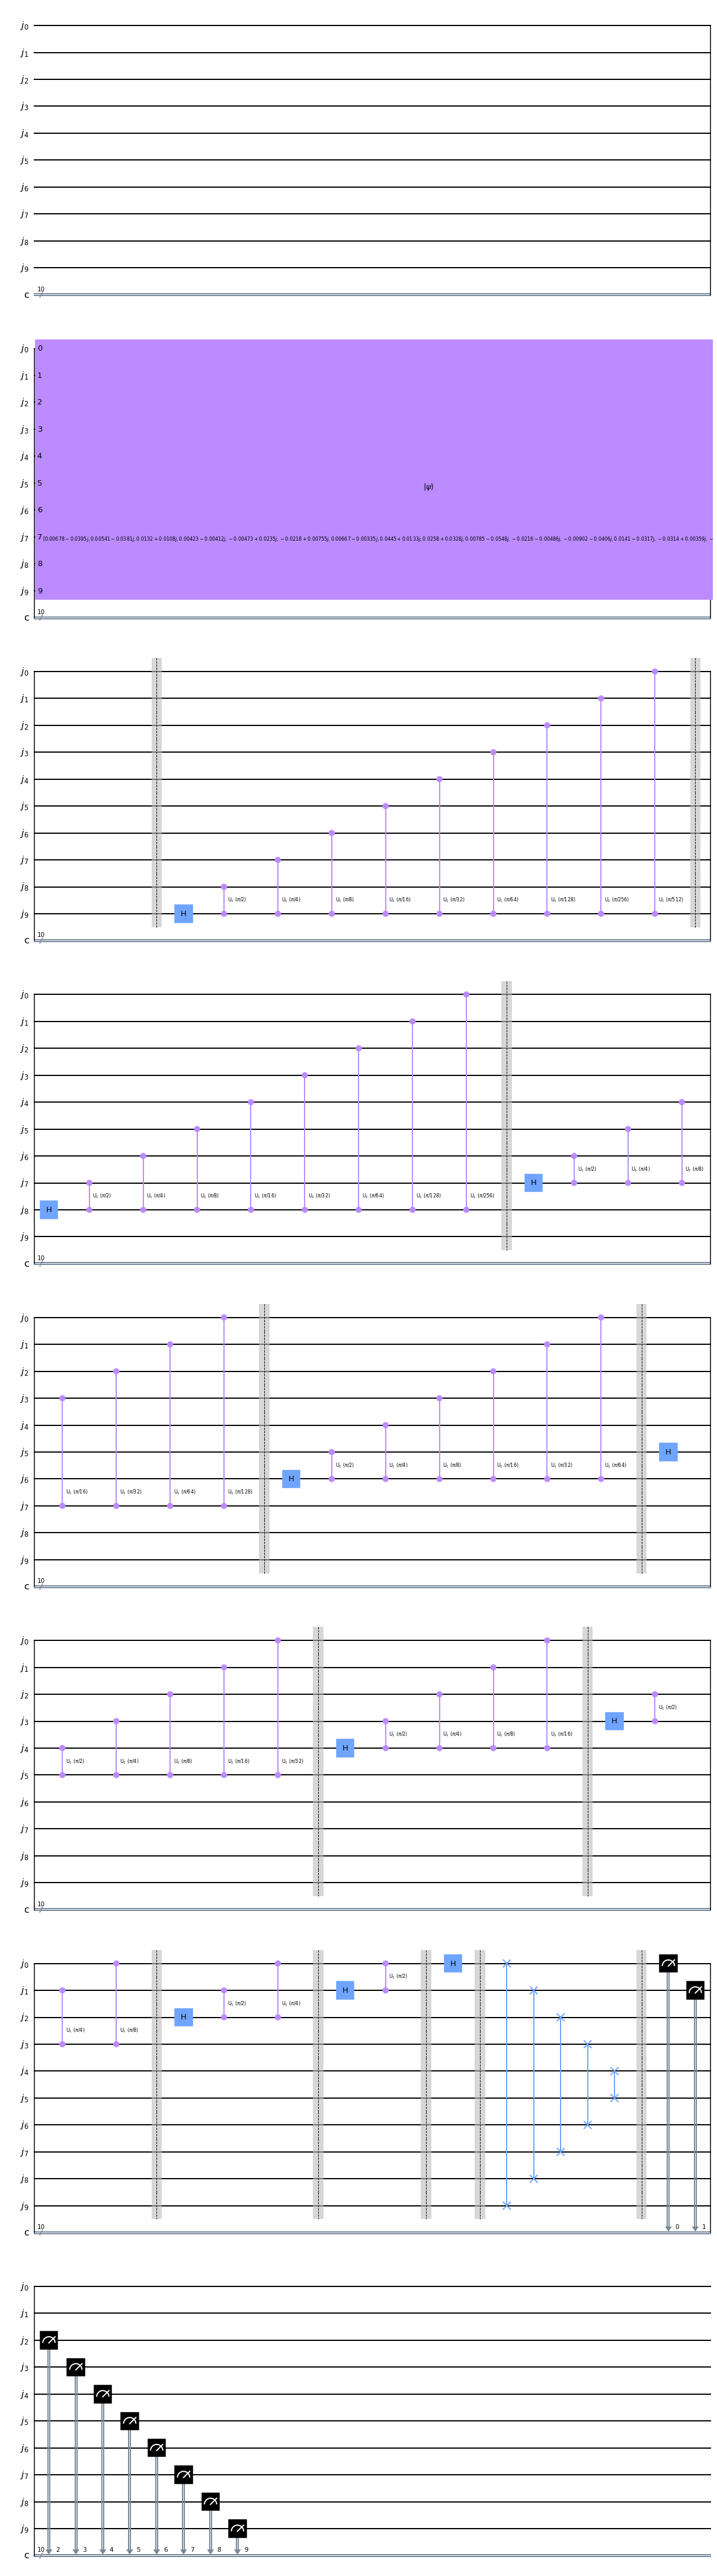

In [28]:
n = 10; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_104 = QFT(n,4);

display( QC_QFT_104.draw(output='mpl'));

 QFT(): FUNCIONA


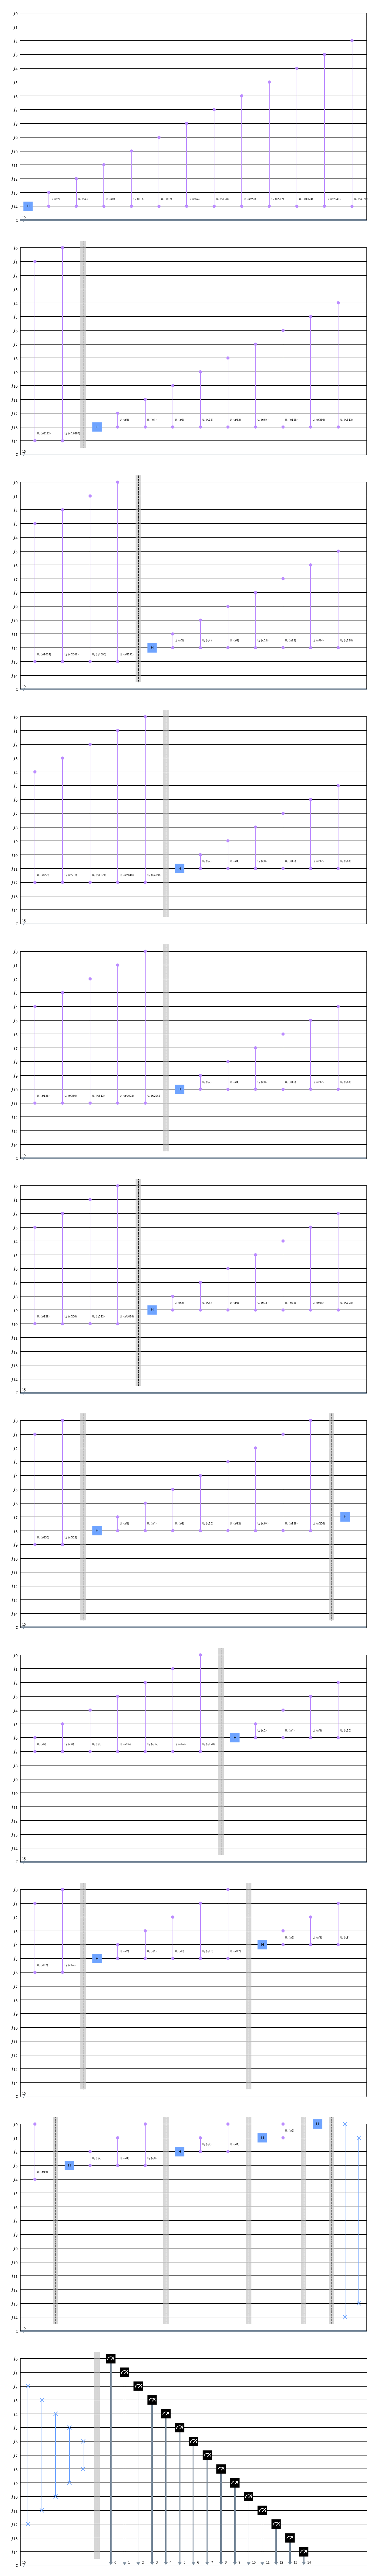

In [29]:
n = 15; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_150 = QFT(n,0);

display( QC_QFT_150.draw(output='mpl'));

 QFT(): FUNCIONA


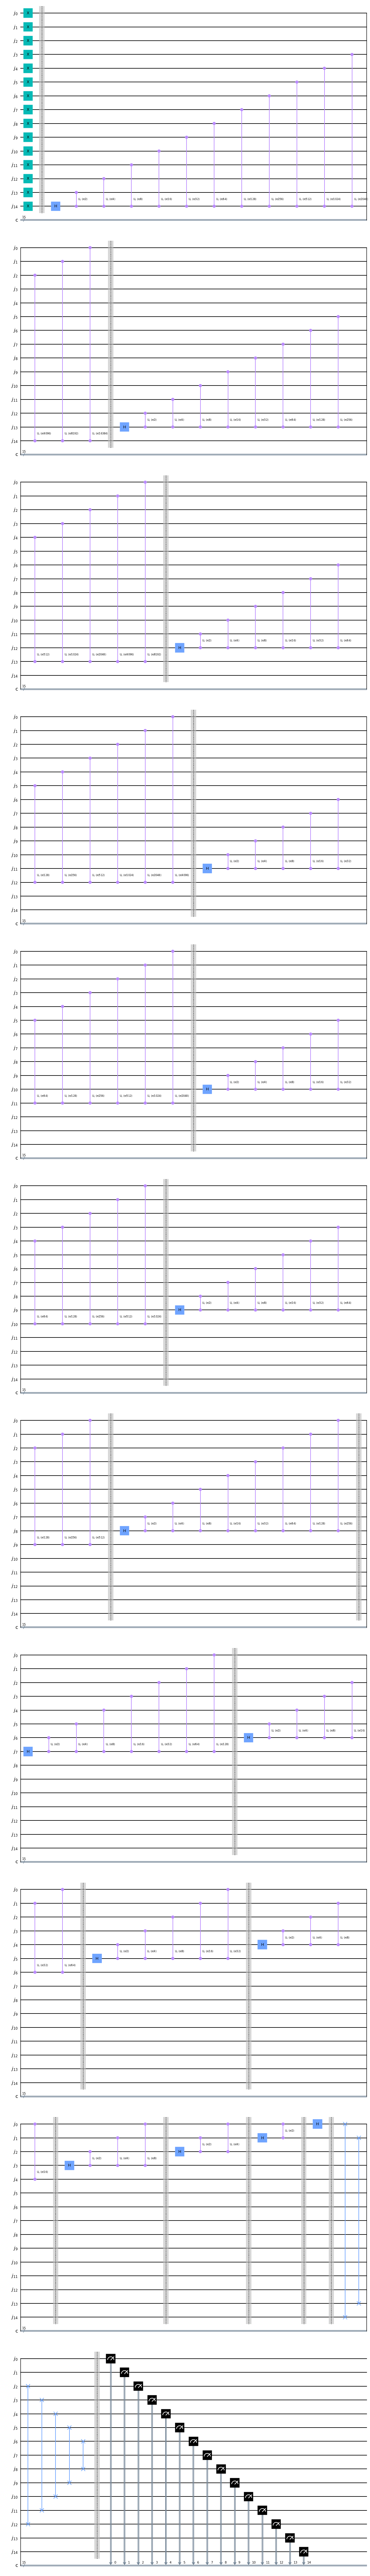

In [30]:
n = 15; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_151 = QFT(n,1);

display( QC_QFT_151.draw(output='mpl'));

 QFT(): FUNCIONA


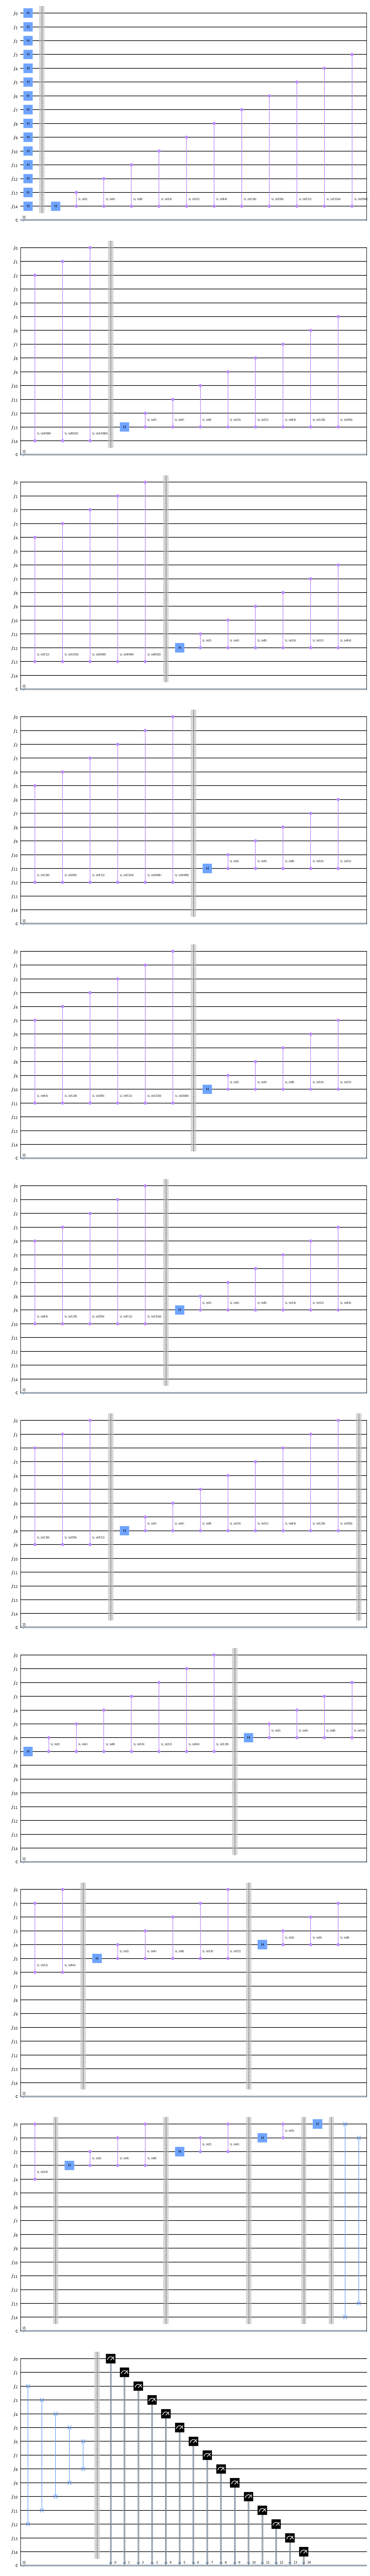

In [31]:
n = 15; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_152 = QFT(n,2);

display( QC_QFT_152.draw(output='mpl'));

 QFT(): FUNCIONA


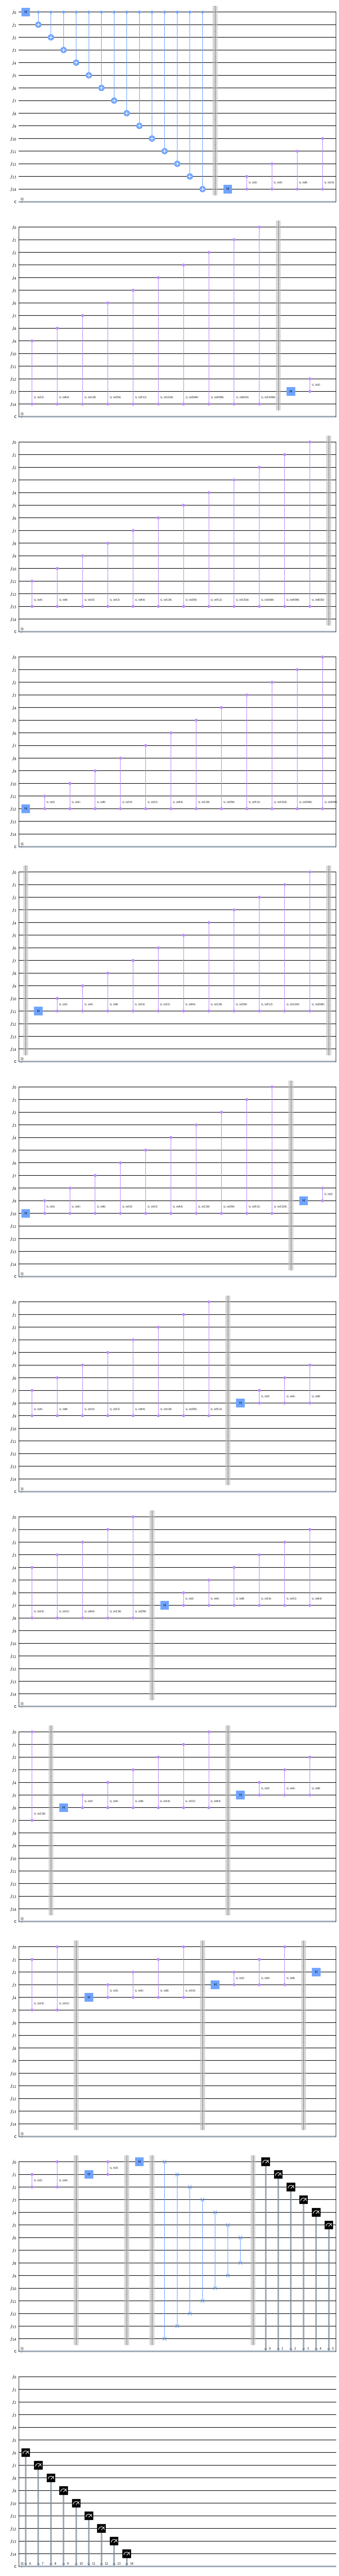

In [32]:
n = 15; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_153 = QFT(n,3);

display( QC_QFT_153.draw(output='mpl'));

 QFT(): FUNCIONA


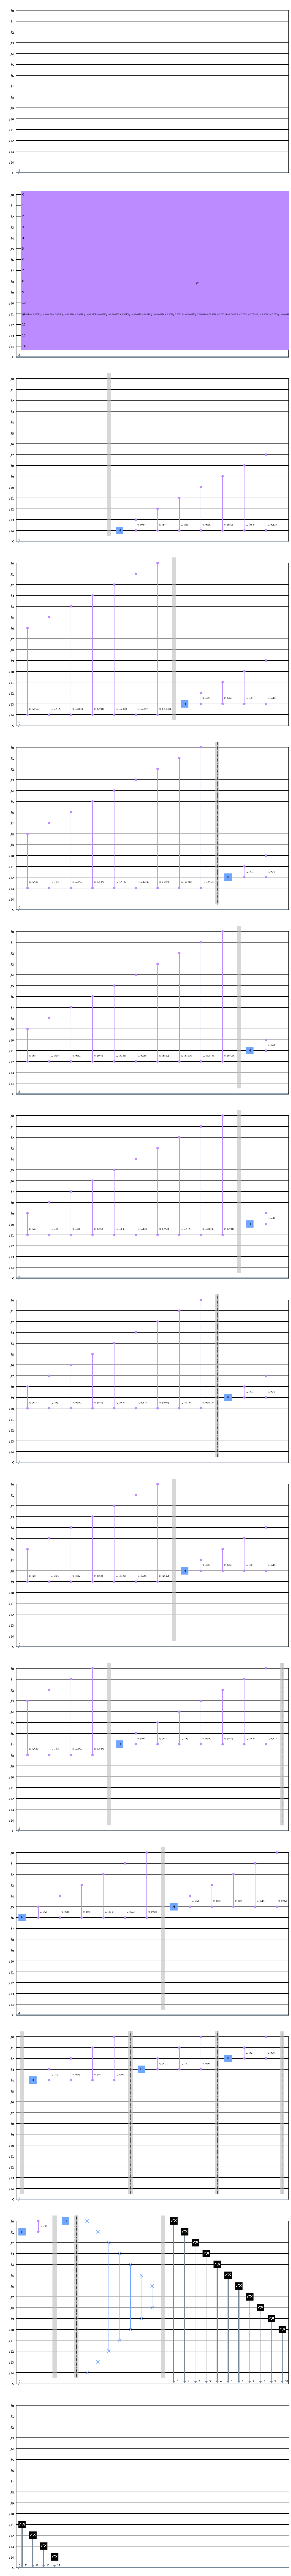

In [33]:
n = 15; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_154 = QFT(n,4);

display( QC_QFT_154.draw(output='mpl'));

## Simulação Artificial (computador clássico) <a class="anchor" id="second-bullet"></a>

In [34]:
#------------------------------------------------------------------------
# SIMULANDO O CIRCUITO:
#------------------------------------------------------------------------
N_SHOTS = 10**(6)
BACKEND_NAME = "qasm_simulator"

DADOS_20 = SIMULADOR_LOCAL(QC_QFT_20, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'01': 249654, '10': 250346, '11': 249832, '00': 250168}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [35]:
DADOS_21 = SIMULADOR_LOCAL(QC_QFT_21, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'11': 250037, '00': 250704, '10': 249302, '01': 249957}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [36]:
DADOS_22 = SIMULADOR_LOCAL(QC_QFT_22, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'00': 1000000}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [37]:
DADOS_23 = SIMULADOR_LOCAL(QC_QFT_23, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'00': 500247, '11': 250799, '01': 248954}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [38]:
DADOS_24 = SIMULADOR_LOCAL(QC_QFT_24, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'00': 544659, '01': 367415, '11': 63331, '10': 24595}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [39]:
DADOS_30 = SIMULADOR_LOCAL(QC_QFT_30, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'000': 124772, '100': 125191, '001': 124481, '101': 125114, '011': 124748, '010': 125442, '110': 125005, '111': 125247}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [40]:
DADOS_31 = SIMULADOR_LOCAL(QC_QFT_31, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'101': 125606, '001': 125237, '111': 125033, '010': 125474, '000': 124311, '011': 125616, '110': 124581, '100': 124142}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [41]:
DADOS_32 = SIMULADOR_LOCAL(QC_QFT_32, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'000': 1000000}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [42]:
DADOS_33 = SIMULADOR_LOCAL(QC_QFT_33, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'010': 124834, '000': 248910, '111': 213730, '001': 213704, '101': 36858, '110': 124999, '011': 36965}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [43]:
DADOS_34 = SIMULADOR_LOCAL(QC_QFT_34, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'110': 339726, '000': 137403, '100': 34510, '111': 267849, '010': 142127, '011': 39502, '101': 24881, '001': 14002}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [44]:
DADOS_40 = SIMULADOR_LOCAL(QC_QFT_40, N_SHOTS, BACKEND_NAME)
DADOS_41 = SIMULADOR_LOCAL(QC_QFT_41, N_SHOTS, BACKEND_NAME)
DADOS_42 = SIMULADOR_LOCAL(QC_QFT_42, N_SHOTS, BACKEND_NAME)
DADOS_43 = SIMULADOR_LOCAL(QC_QFT_43, N_SHOTS, BACKEND_NAME)
DADOS_44 = SIMULADOR_LOCAL(QC_QFT_44, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'1100': 62223, '1011': 62219, '1111': 62522, '0110': 62422, '0100': 62548, '0101': 62600, '0000': 62836, '1000': 62389, '1001': 62409, '1101': 62251, '0011': 62651, '0010': 62831, '1110': 62551, '1010': 62772, '0111': 62396, '0001': 62380}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0111': 62768, '0011': 63036, '1100': 62546, '0000': 62329, '0110': 62208, '0001': 62331, '1011': 62221, '1110': 62298, '0101': 62503, '1010': 63260, '1000': 62302, '0100': 62242, '1001': 62672, '1111': 62198, '0010': 62665, '1101': 62421}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0000': 1000000}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_

In [45]:
DADOS_50 = SIMULADOR_LOCAL(QC_QFT_50, N_SHOTS, BACKEND_NAME)
DADOS_51 = SIMULADOR_LOCAL(QC_QFT_51, N_SHOTS, BACKEND_NAME)
DADOS_52 = SIMULADOR_LOCAL(QC_QFT_52, N_SHOTS, BACKEND_NAME)
DADOS_53 = SIMULADOR_LOCAL(QC_QFT_53, N_SHOTS, BACKEND_NAME)
DADOS_54 = SIMULADOR_LOCAL(QC_QFT_54, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'01000': 31295, '00000': 31276, '01100': 31277, '10011': 31195, '11100': 31272, '10100': 31022, '10110': 31432, '11000': 31402, '11110': 31186, '10111': 31403, '10101': 31296, '01001': 31095, '10001': 31512, '01101': 31103, '00001': 31046, '01011': 31453, '11111': 31360, '00101': 31236, '00011': 31543, '11011': 31051, '00100': 31376, '11010': 31499, '00110': 31434, '01111': 31139, '00111': 31194, '10010': 31145, '01110': 31206, '11001': 31212, '00010': 31243, '01010': 30913, '11101': 31058, '10000': 31126}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'00101': 31427, '10001': 31065, '01000': 31229, '01100': 31369, '10111': 31351, '01111': 31489, '00111': 31466, '11111': 31042, '01001': 31106, '00100': 31453, '01011': 31359, '10100': 31194, '10010': 31347, '00001': 30883, '10011'

In [46]:
DADOS_100 = SIMULADOR_LOCAL(QC_QFT_100, N_SHOTS, BACKEND_NAME)
DADOS_101 = SIMULADOR_LOCAL(QC_QFT_101, N_SHOTS, BACKEND_NAME)
DADOS_102 = SIMULADOR_LOCAL(QC_QFT_102, N_SHOTS, BACKEND_NAME)
DADOS_103 = SIMULADOR_LOCAL(QC_QFT_103, N_SHOTS, BACKEND_NAME)
DADOS_104 = SIMULADOR_LOCAL(QC_QFT_104, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0100101000': 1001, '1010001110': 1002, '1010010110': 966, '0101101010': 944, '1011110110': 1013, '0110000011': 973, '0010001000': 927, '1100010110': 972, '0100010000': 1010, '0001001101': 1011, '0100001100': 944, '1110011111': 943, '0001110001': 961, '1011011101': 931, '1100000001': 967, '0010010011': 1041, '1111001100': 986, '0111011000': 988, '1001001100': 1015, '0011001011': 1021, '0011100000': 919, '0110101001': 988, '1101110001': 943, '0111010110': 957, '0110111101': 984, '0011001001': 979, '1111101101': 985, '1011100001': 1023, '1100100001': 997, '1000101101': 1015, '1111101010': 984, '1011100100': 973, '0010001100': 1007, '0011111100': 1014, '0100100000': 954, '0001100011': 972, '1011110011': 986, '0101101101': 980, '1100010011': 946, '0110000110': 956, '1110000010': 1021, '0100001000': 976, '0101010101': 982, '0000011011': 1006, '0100111100': 1007, '1011110000': 971, '1100010000

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'1000101000': 968, '0011111101': 956, '1010011001': 1044, '0010000010': 995, '0110001001': 970, '1011010110': 1013, '1100001100': 956, '0010011010': 947, '1101011111': 983, '1011000001': 993, '1101000001': 978, '1010111111': 1008, '0000000110': 984, '1011010000': 945, '1100001110': 1020, '1100110000': 968, '1000111010': 971, '1110110011': 943, '1101111101': 929, '1111011001': 901, '1100000101': 946, '0010010111': 966, '0110101101': 1028, '1001011100': 999, '1111010001': 987, '1001000000': 943, '0110111001': 995, '1111000000': 918, '0011101100': 933, '0111101000': 1012, '0011000001': 1016, '0011100001': 944, '0100011111': 960, '0001000010': 944, '1000111100': 941, '1110110001': 974, '1010010010': 971, '1010001010': 955, '1111011000': 1002, '1101111110': 972, '1000111000': 964, '0011001000': 956, '0101100101': 946, '1011111011': 973, '1101100111': 929, '0110010100': 947, '0101011110': 991,

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0000000111': 1942, '1101000000': 1342, '1000100111': 25, '1100101011': 1193, '1011101011': 839, '1111100111': 1933, '0010110111': 1321, '0101111100': 297, '0001011011': 1810, '1010111111': 623, '0000000110': 1975, '1101000001': 1315, '1101011111': 1542, '1011000001': 626, '1000111010': 66, '1110110011': 1809, '0100011101': 854, '0001000000': 1948, '1110010010': 1716, '0100000111': 886, '0001111110': 1709, '1000001101': 6, '1111110111': 1977, '0000111001': 1822, '1101110100': 1691, '1000001000': 2, '0000111110': 1902, '0000100010': 1868, '0001001101': 1863, '0100010000': 843, '0100001100': 864, '1110011111': 1810, '0001110001': 1713, '1101010010': 1422, '1011001110': 717, '0000001011': 2004, '1010110010': 531, '1101001110': 1516, '0000000000': 1960, '1101000111': 1375, '1011000111': 629, '0010101001': 1534, '0000110111': 1824, '1111111001': 1956, '0101111101': 289, '0010110000': 1439, '1

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'0001010110': 6984, '0111000011': 1268, '1001111000': 710, '0001110110': 213, '1110011010': 825, '0100001101': 950, '0001001100': 529, '0100010111': 1363, '0001111111': 1726, '1110010001': 1125, '0100000100': 1318, '1100001111': 1360, '1011010011': 693, '0010011101': 2108, '1100110011': 1606, '1101011110': 845, '1011000010': 793, '1010111110': 42, '1101000010': 141, '0000000101': 1977, '0110100111': 641, '1001010000': 645, '1111011011': 893, '1110110000': 1718, '1000111011': 463, '1000101000': 796, '1001010111': 513, '1101111000': 535, '0110100000': 1013, '1111011110': 894, '1110110111': 35, '1000111110': 2266, '1100110100': 2263, '1110010110': 1426, '0001111010': 1292, '0100000011': 784, '0001000100': 2620, '0000101101': 3621, '1001100101': 924, '1110100101': 673, '0111001010': 1589, '0100111010': 2101, '0000011110': 20, '0101010010': 1505, '1010101110': 160, '1101101110': 122, '0110011

In [47]:
DADOS_150 = SIMULADOR_LOCAL(QC_QFT_150, N_SHOTS, BACKEND_NAME)
DADOS_151 = SIMULADOR_LOCAL(QC_QFT_151, N_SHOTS, BACKEND_NAME)
DADOS_152 = SIMULADOR_LOCAL(QC_QFT_152, N_SHOTS, BACKEND_NAME)
DADOS_153 = SIMULADOR_LOCAL(QC_QFT_153, N_SHOTS, BACKEND_NAME)
DADOS_154 = SIMULADOR_LOCAL(QC_QFT_154, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'100101110010110': 31, '000100010010010': 33, '011001110011111': 27, '011011111100110': 35, '110000111111011': 42, '110111111000010': 28, '101001101100101': 38, '101000001000100': 36, '111011110010110': 35, '000101000111110': 32, '101100001101011': 36, '011110010001001': 34, '011011001000000': 33, '110011001000011': 30, '001100011010000': 36, '101101110110100': 32, '001011110111010': 25, '111100100100101': 26, '010110111110111': 32, '000101011101100': 26, '011011101011111': 25, '101110100101011': 37, '001111110110100': 34, '111010011010110': 28, '001101111111101': 30, '000110011000011': 44, '101001000011110': 27, '000001111011011': 29, '001010101100111': 30, '010000010011011': 28, '010010011100010': 34, '001110101001101': 32, '111011000101111': 28, '111111001000111': 24, '100001101110101': 23, '000000110100111': 31, '111000110110101': 20, '011011101111010': 23, '011101001111100': 31, '11

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'011010000001110': 35, '010001110011011': 37, '000011110001001': 32, '110010010101010': 37, '010010001011010': 28, '001010111111101': 25, '000011110101111': 43, '000010001010001': 27, '100000010011100': 26, '011010000110000': 29, '010001010000100': 40, '100000011100111': 33, '000000001000000': 32, '101001011110011': 33, '000101001000011': 30, '011101011110110': 30, '111011100001011': 33, '001100100001111': 32, '101100100010101': 25, '100001111100100': 42, '101001100011100': 22, '010010111001011': 31, '001110000100110': 31, '111000100000100': 33, '001011000000001': 27, '110010100000111': 31, '011110100011011': 47, '101011010001110': 38, '101000111101001': 41, '000000110011101': 24, '101101010010101': 41, '101111011101110': 29, '110110000011111': 33, '110111100110001': 29, '011011000111111': 22, '010100010110100': 26, '000100001101000': 31, '001001101000000': 27, '111101011110010': 30, '01

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'000000000000000': 1000000}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'110101110100010': 51, '101001110111100': 14, '010100001011101': 18, '000111000100100': 52, '111001110010000': 68, '001100001011001': 50, '101011101001010': 27, '010010010111010': 27, '000001111000001': 76, '110010001101010': 37, '110101010001011': 42, '111111100101101': 59, '001001001111110': 51, '011000101001110': 6, '100010110111011': 2, '110011111110110': 35, '110001110111111': 39, '001011100101100': 40, '010010001110110': 24, '000011111000101': 65, '000110011011000': 62, '010000011100100': 35, '000001110000100': 48, '000110001111110': 49, '000110110111001': 57, '010010010011101': 25, '111011000011001': 52, '000010001100101': 66, '101001000001000': 12, '111001000110111': 48, '011100100000001': 3, '0101

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'011010101001001': 56, '110001010011011': 57, '001110110110100': 14, '001000000011110': 117, '001000010111000': 7, '000011111001110': 45, '010010001111111': 32, '100010000111000': 60, '000111011100101': 56, '000100001001100': 56, '100000000011011': 136, '110001001010110': 94, '111101111100001': 60, '100101011100011': 205, '010111100000001': 30, '001101010110101': 22, '011001000110011': 61, '100111101010100': 5, '001111101101011': 61, '111001101101010': 19, '000111001011110': 6, '100100011101111': 33, '001010001110111': 48, '010100011000110': 62, '010100101111100': 1, '110010101110011': 110, '000101011000111': 55, '111110110010111': 64, '000110001001000': 2, '110101110111100': 12, '010011110000000': 38, '010101001000010': 29, '110101000100100': 2, '100110100010110': 115, '111001011101010': 120, '100111000111001': 22, '010100100000110': 8, '101100100111011': 48, '110101111100110': 112, '10

In [48]:
#------------------------------------------------------------------------
# PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram;

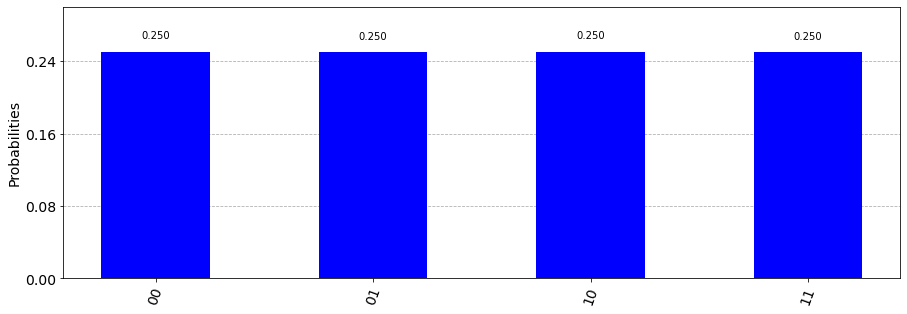

In [49]:
plot_histogram( DADOS_20, bar_labels = True, color='blue', figsize = (15, 5) )

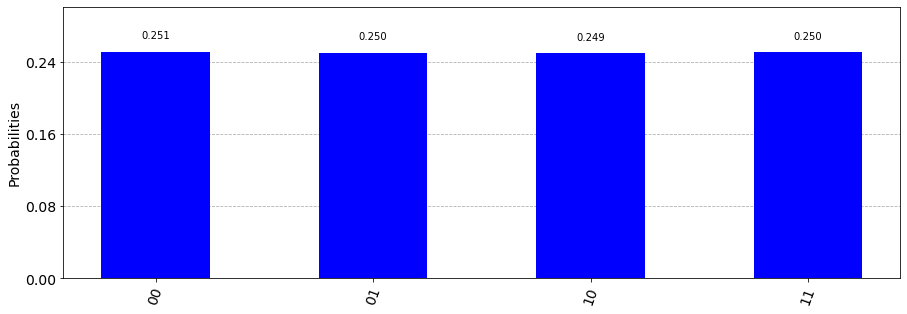

In [50]:
plot_histogram( DADOS_21, bar_labels = True, color='blue', figsize = (15, 5) )

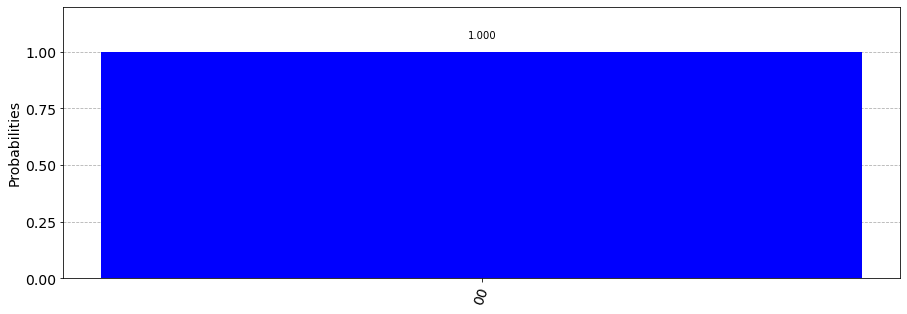

In [51]:
plot_histogram( DADOS_22, bar_labels = True, color='blue', figsize = (15, 5) )

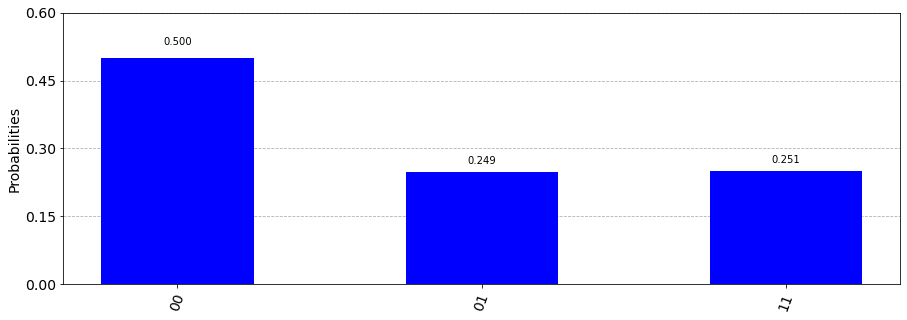

In [52]:
plot_histogram( DADOS_23, bar_labels = True, color='blue', figsize = (15, 5) )

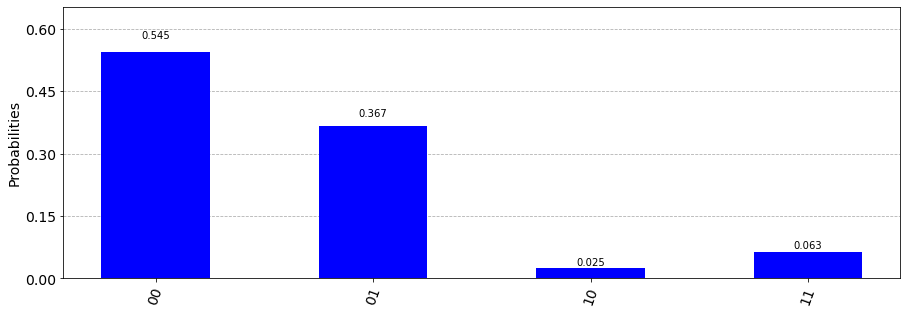

In [53]:
plot_histogram( DADOS_24, bar_labels = True, color='blue', figsize = (15, 5) )

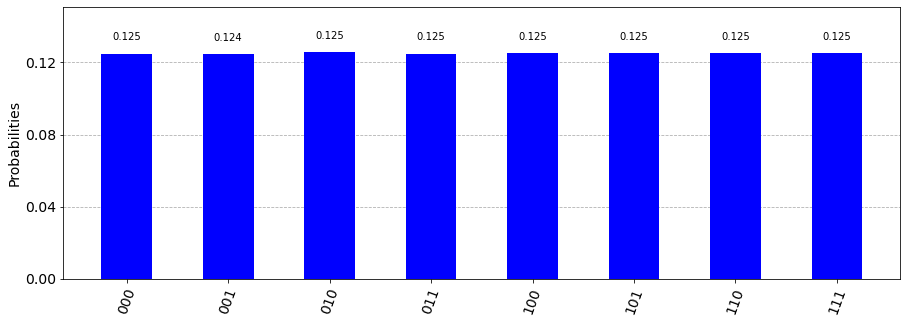

In [54]:
plot_histogram( DADOS_30, bar_labels = True, color='blue', figsize = (15, 5) )

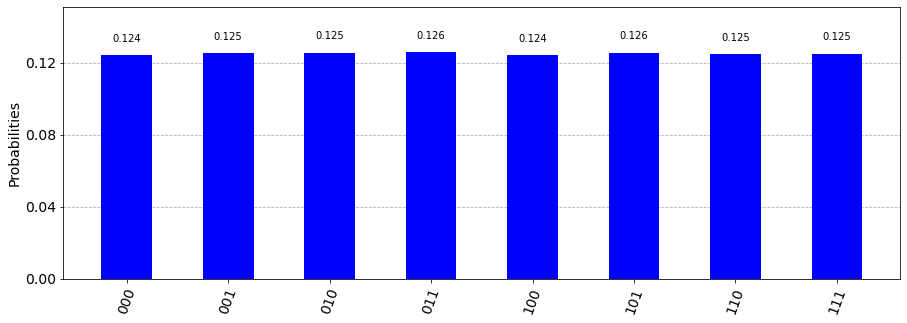

In [55]:
plot_histogram( DADOS_31, bar_labels = True, color='blue', figsize = (15, 5) )

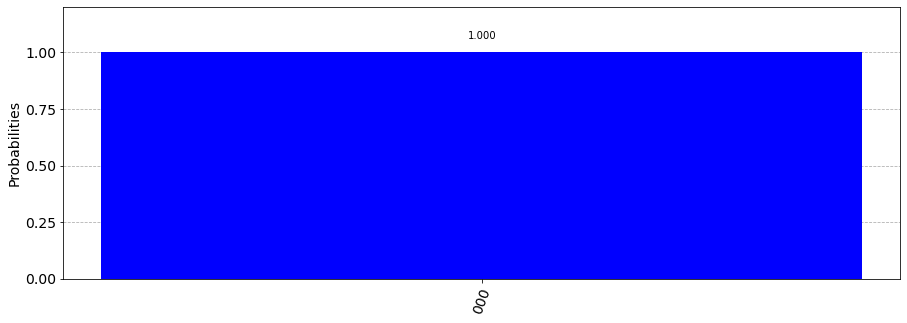

In [56]:
plot_histogram( DADOS_32, bar_labels = True, color='blue', figsize = (15, 5) )

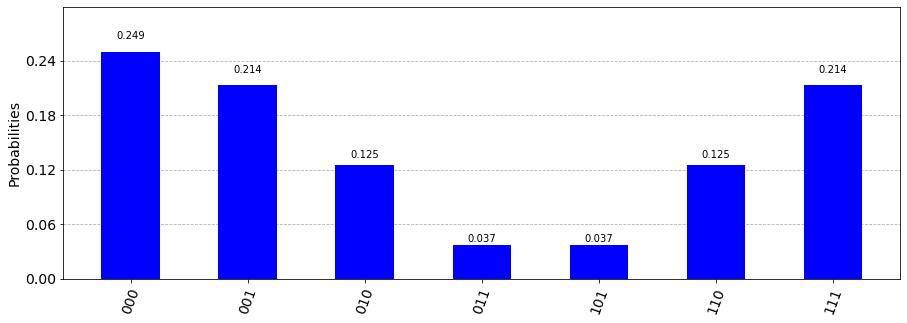

In [57]:
plot_histogram( DADOS_33, bar_labels = True, color='blue', figsize = (15, 5) )

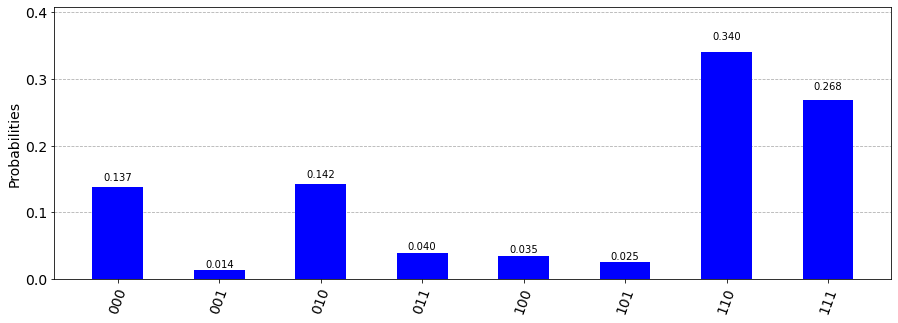

In [58]:
plot_histogram( DADOS_34, bar_labels = True, color='blue', figsize = (15, 5) )

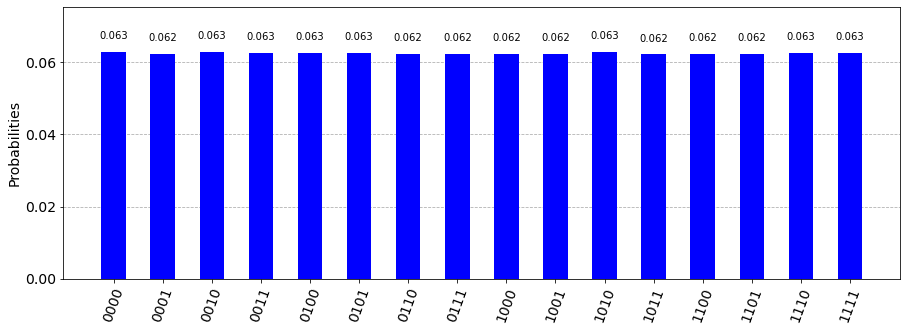

In [59]:
plot_histogram( DADOS_40, bar_labels = True, color='blue', figsize = (15, 5) )

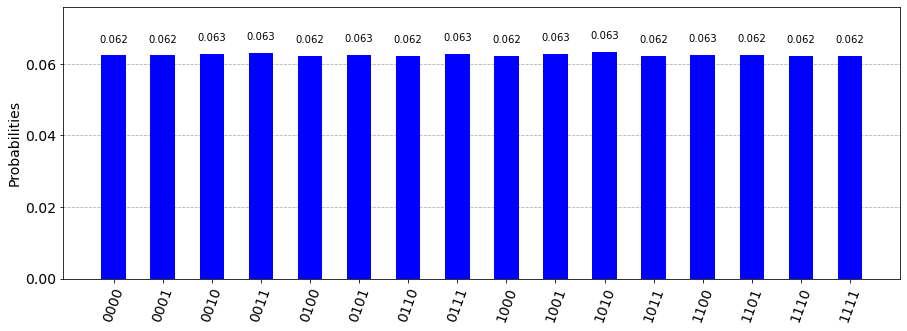

In [60]:
plot_histogram( DADOS_41, bar_labels = True, color='blue', figsize = (15, 5) )

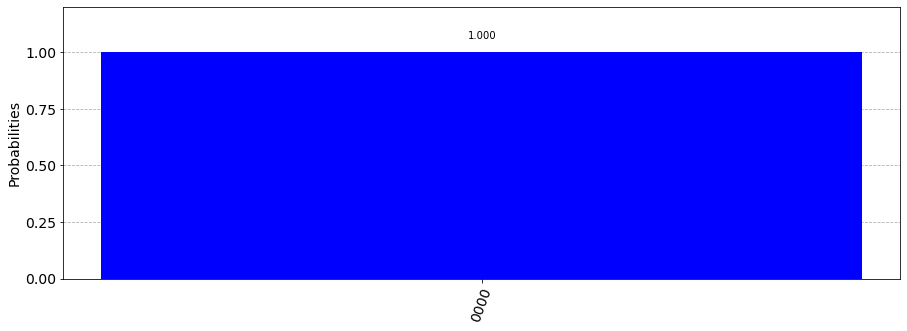

In [61]:
plot_histogram( DADOS_42, bar_labels = True, color='blue', figsize = (15, 5) )

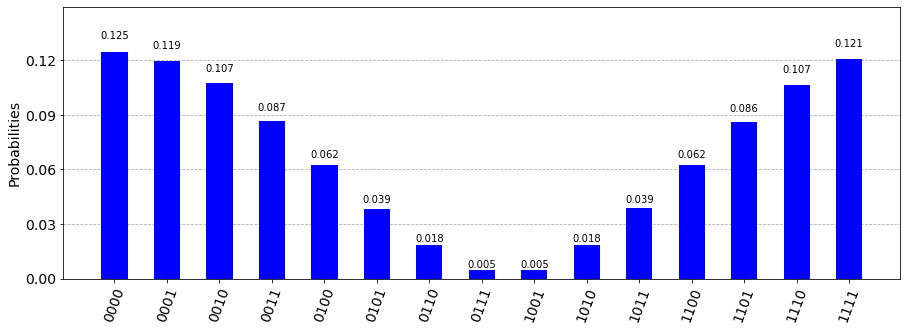

In [62]:
plot_histogram( DADOS_43, bar_labels = True, color='blue', figsize = (15, 5) )

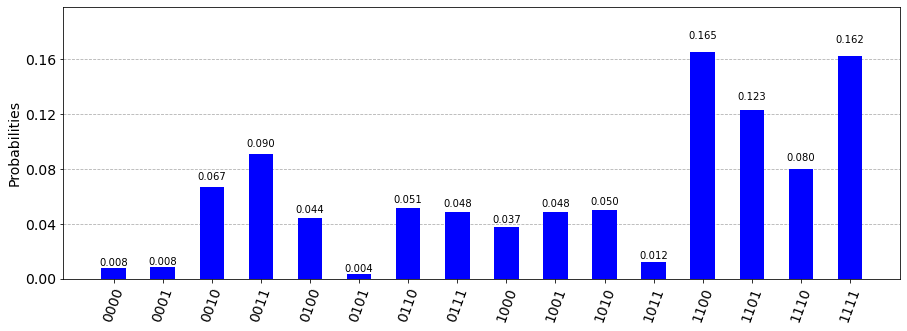

In [63]:
plot_histogram( DADOS_44, bar_labels = True, color='blue', figsize = (15, 5) )

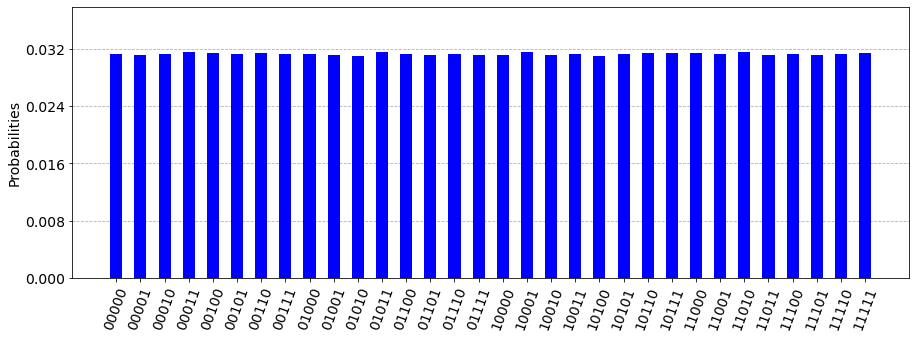

In [65]:
plot_histogram( DADOS_50, bar_labels = False, color='blue', figsize = (15, 5) )

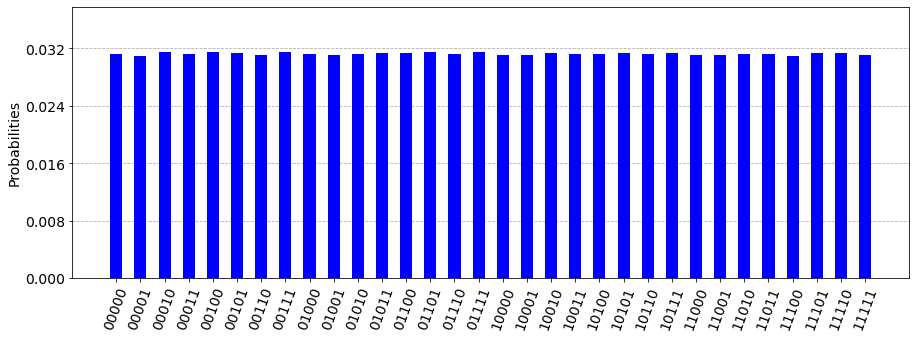

In [66]:
plot_histogram( DADOS_51, bar_labels = False, color='blue', figsize = (15, 5) )

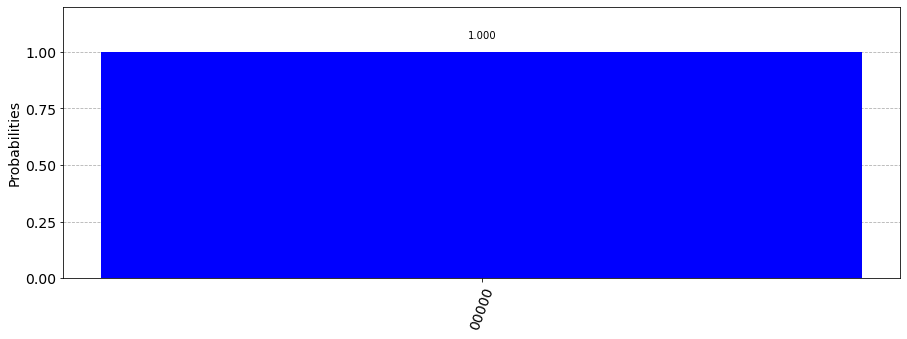

In [67]:
plot_histogram( DADOS_52, bar_labels = True, color='blue', figsize = (15, 5) )

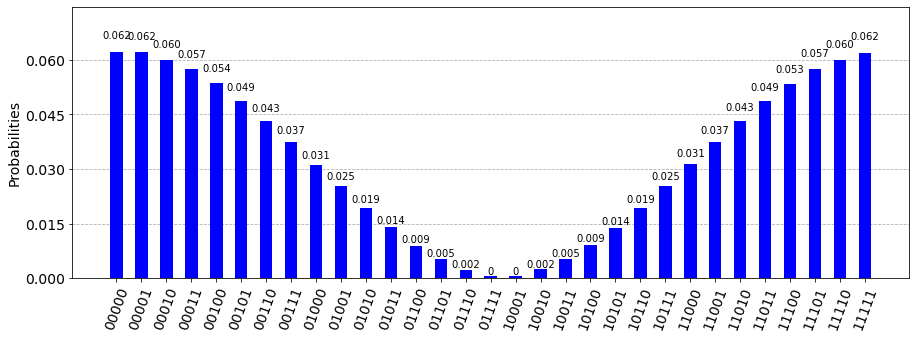

In [68]:
plot_histogram( DADOS_53, bar_labels = True, color='blue', figsize = (15, 5) )

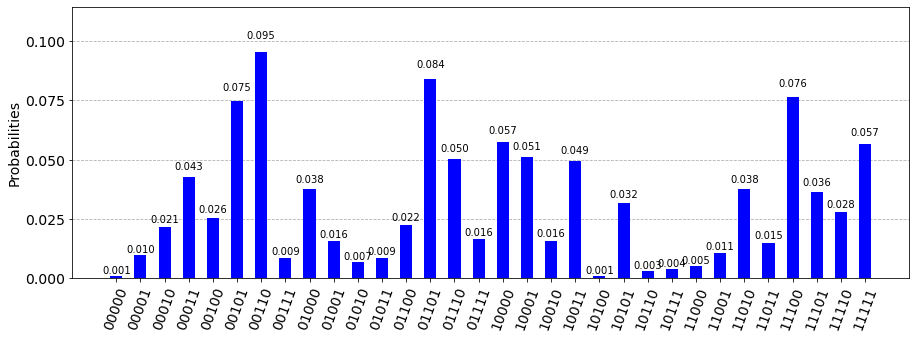

In [69]:
plot_histogram( DADOS_54, bar_labels = True, color='blue', figsize = (15, 5) )

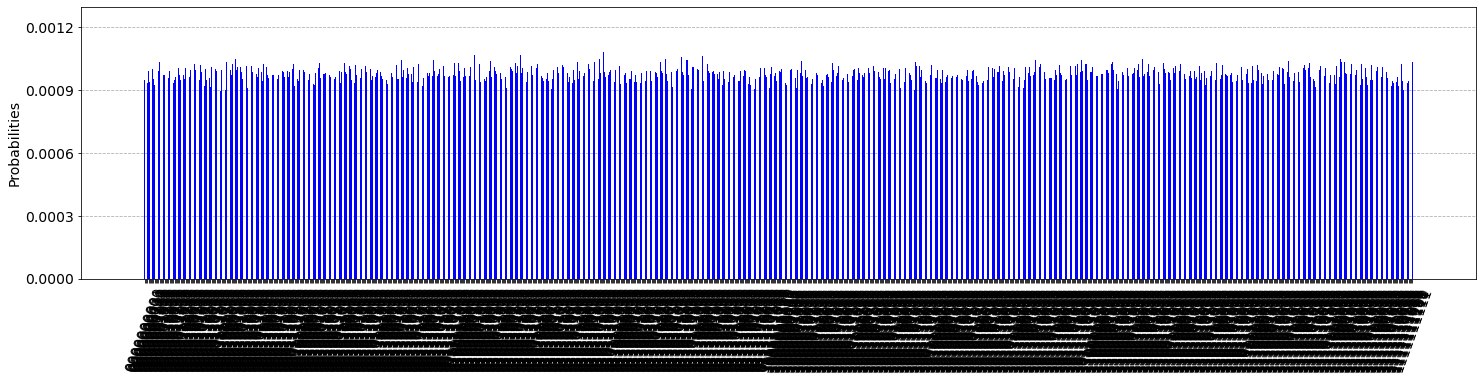

In [70]:
plot_histogram( DADOS_100, bar_labels = False, color='blue', figsize = (25, 5) )

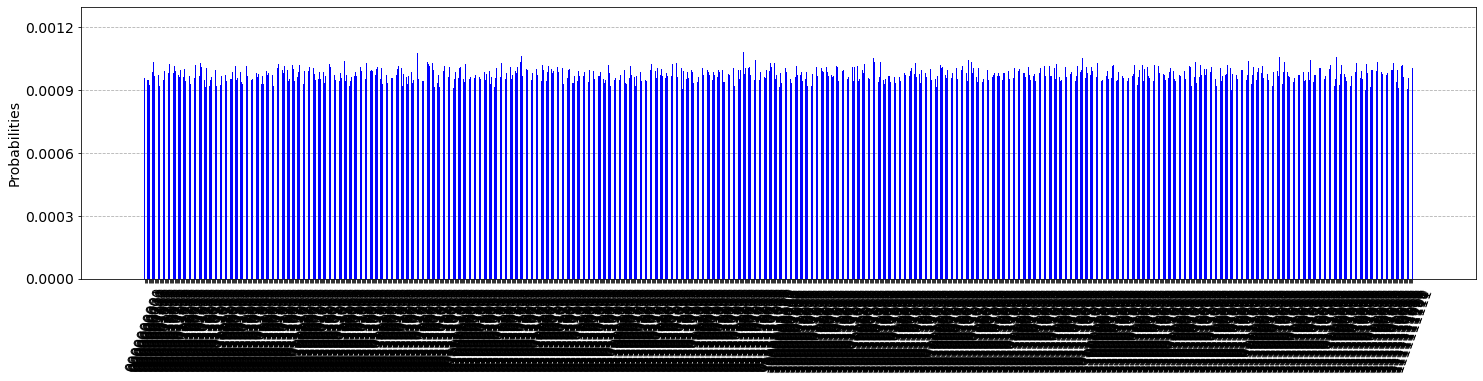

In [71]:
plot_histogram( DADOS_101, bar_labels = False, color='blue', figsize = (25, 5) )

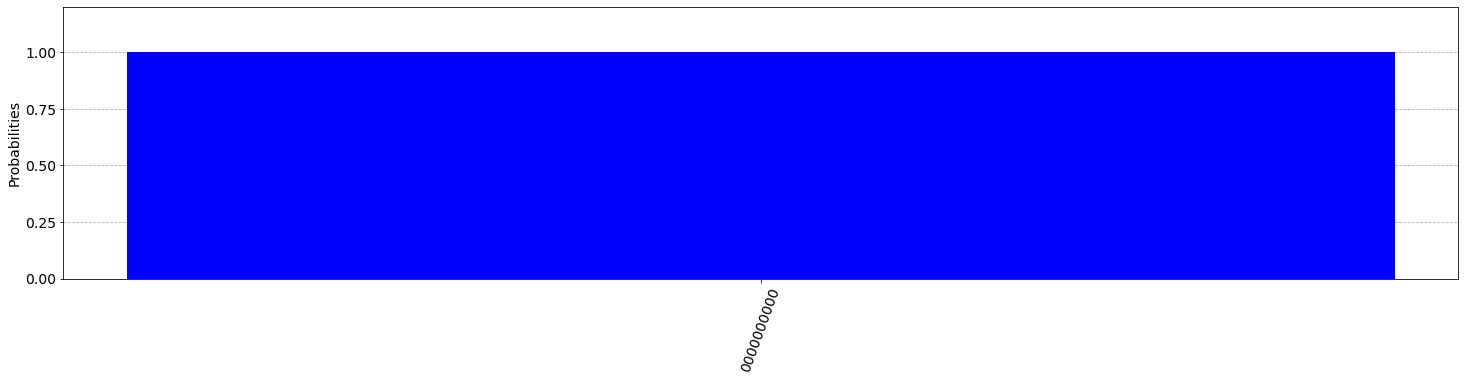

In [72]:
plot_histogram( DADOS_102, bar_labels = False, color='blue', figsize = (25, 5) )

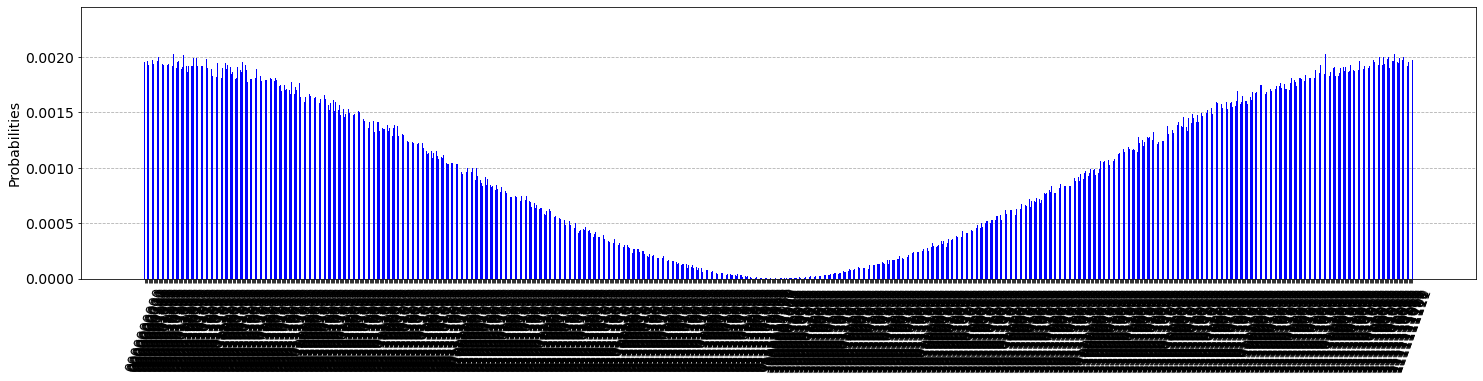

In [73]:
plot_histogram( DADOS_103, bar_labels = False, color='blue', figsize = (25, 5) )

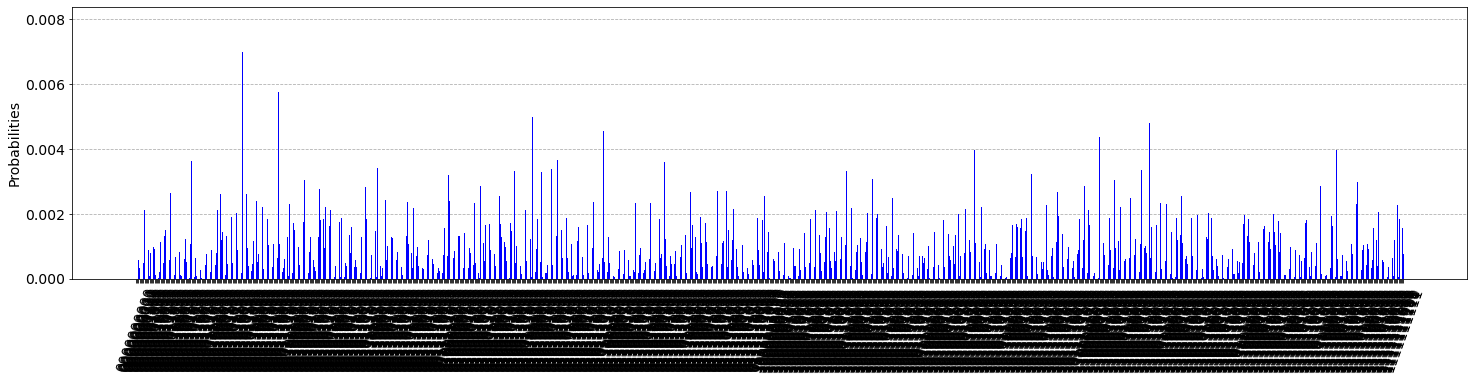

In [74]:
plot_histogram( DADOS_104, bar_labels = False, color='blue', figsize = (25, 5) )

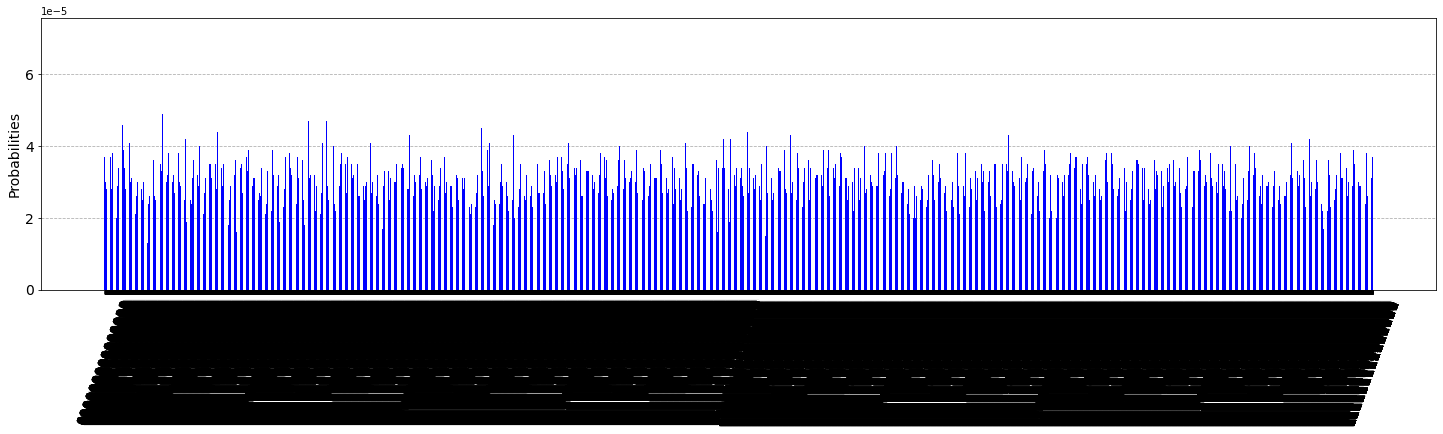

In [75]:
plot_histogram( DADOS_150, bar_labels = False, color='blue', figsize = (25, 5) )

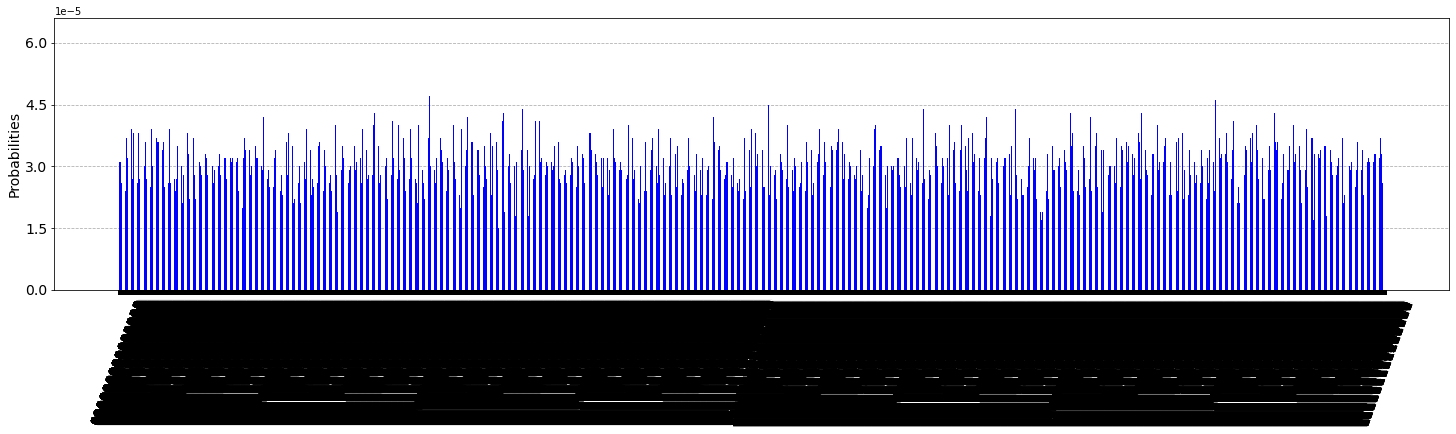

In [76]:
plot_histogram( DADOS_151, bar_labels = False, color='blue', figsize = (25, 5) )

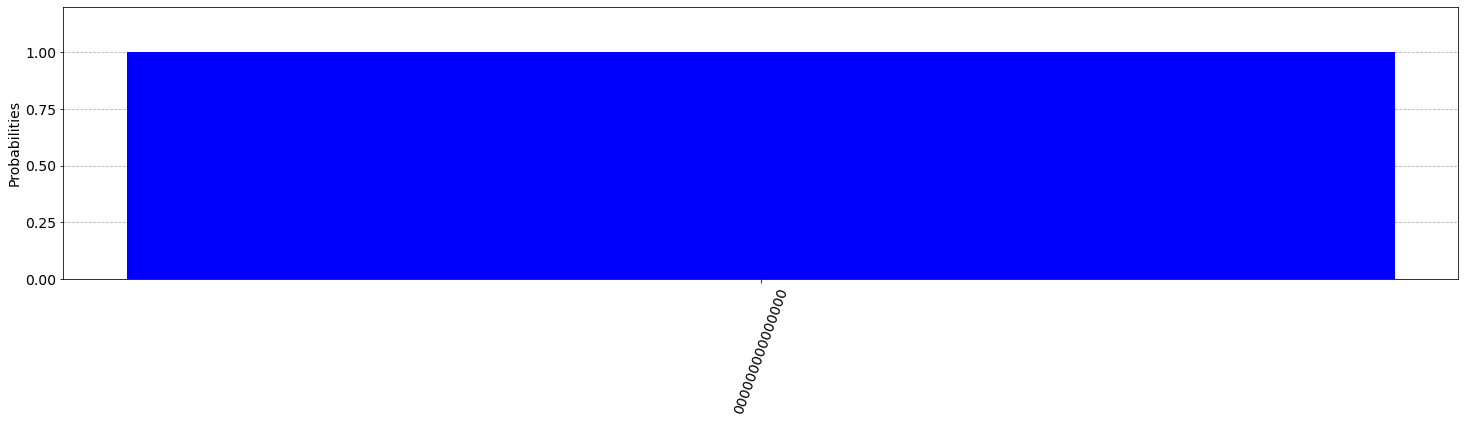

In [77]:
plot_histogram( DADOS_152, bar_labels = False, color='blue', figsize = (25, 5) )

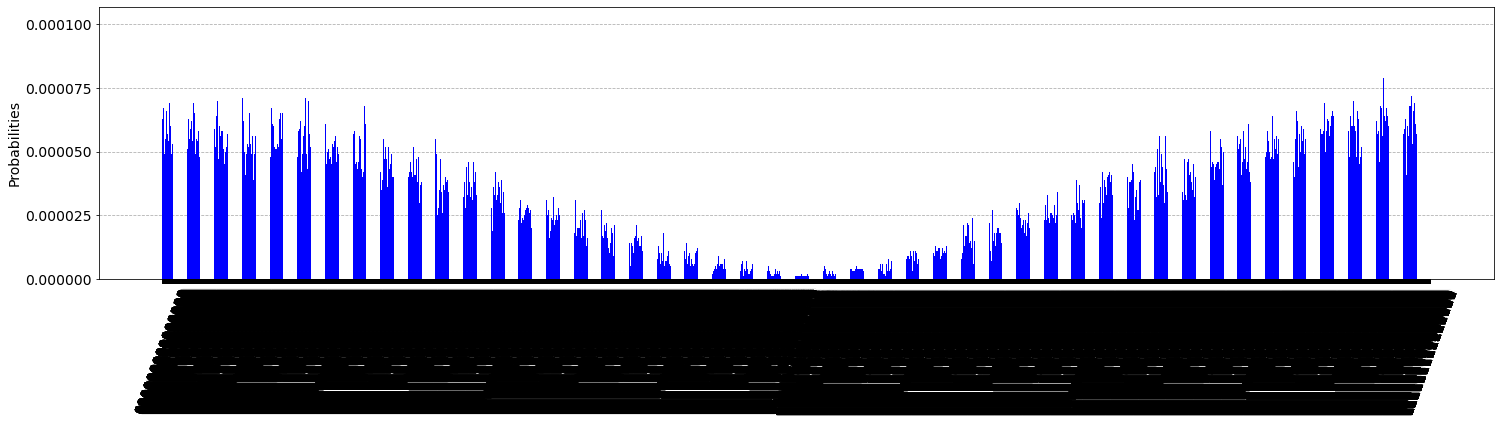

In [78]:
plot_histogram( DADOS_153, bar_labels = False, color='blue', figsize = (25, 5) )

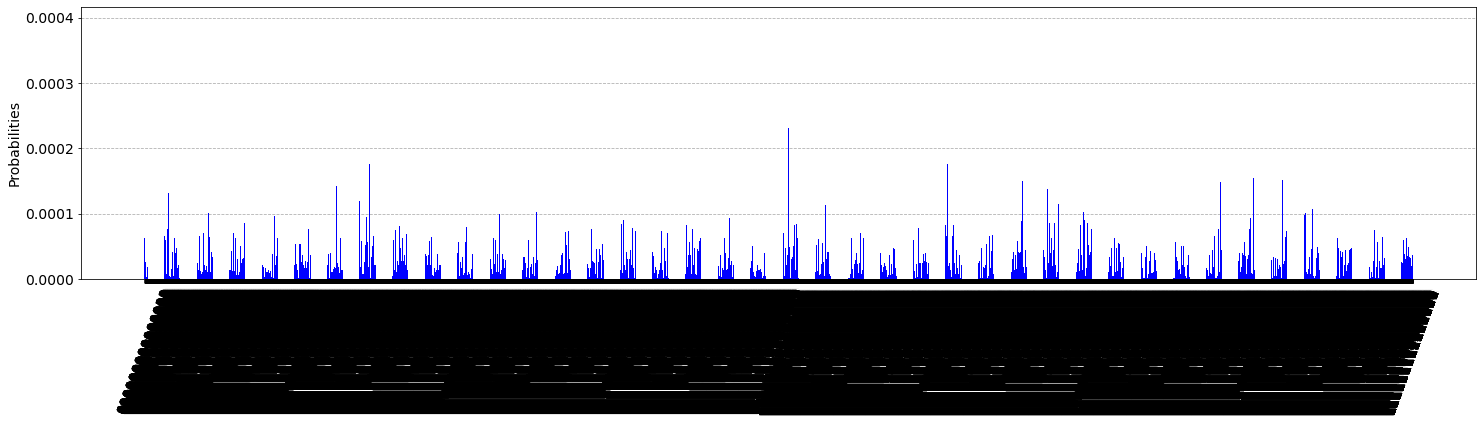

In [79]:
plot_histogram( DADOS_154, bar_labels = False, color='blue', figsize = (25, 5) )

In [81]:
print('get_counts() : ' , DADOS_20)

get_counts() :  {'01': 249654, '10': 250346, '11': 249832, '00': 250168}


In [82]:
print('get_counts() : ' , DADOS_30)

get_counts() :  {'000': 124772, '100': 125191, '001': 124481, '101': 125114, '011': 124748, '010': 125442, '110': 125005, '111': 125247}


## Testando a variação no número de shots <a class="anchor" id="21-bullet"></a>

In [83]:
#------------------------------------------------------------------------
# TESTES:
#------------------------------------------------------------------------
N_SHOTS = 2**(13)
BACKEND_NAME = "qasm_simulator"

DADOS_50_teste = SIMULADOR_LOCAL(QC_QFT_50, N_SHOTS, BACKEND_NAME)
DADOS_100_teste = SIMULADOR_LOCAL(QC_QFT_100, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'01111': 246, '10111': 264, '11000': 269, '01001': 212, '10000': 263, '10101': 265, '01011': 224, '01000': 261, '11111': 260, '11010': 268, '00101': 270, '00001': 225, '11001': 292, '11101': 280, '00011': 268, '10110': 251, '11100': 237, '00000': 259, '01010': 256, '00100': 223, '00111': 245, '01101': 303, '11110': 228, '01110': 240, '10001': 277, '10011': 286, '01100': 280, '00110': 253, '11011': 280, '10100': 259, '10010': 242, '00010': 206}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 
 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'1100110011': 11, '1101011110': 6, '1011000010': 14, '1010111110': 3, '0000000101': 5, '1101000010': 5, '1000111011': 9, '1110110000': 5, '1001010000': 8, '0110100111': 7, '1111011011': 3, '0011110001': 13, '0010111010': 6, '0101110101': 7, '1010101000': 7, '1100100100': 7, '1000101010': 9, '11

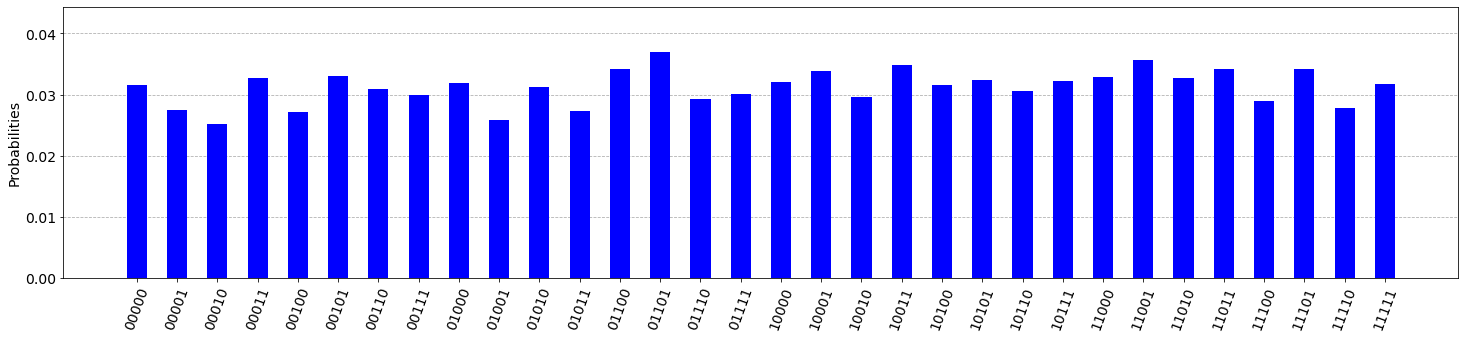

In [84]:
plot_histogram( DADOS_50_teste, bar_labels = False, color='blue', figsize = (25, 5) )

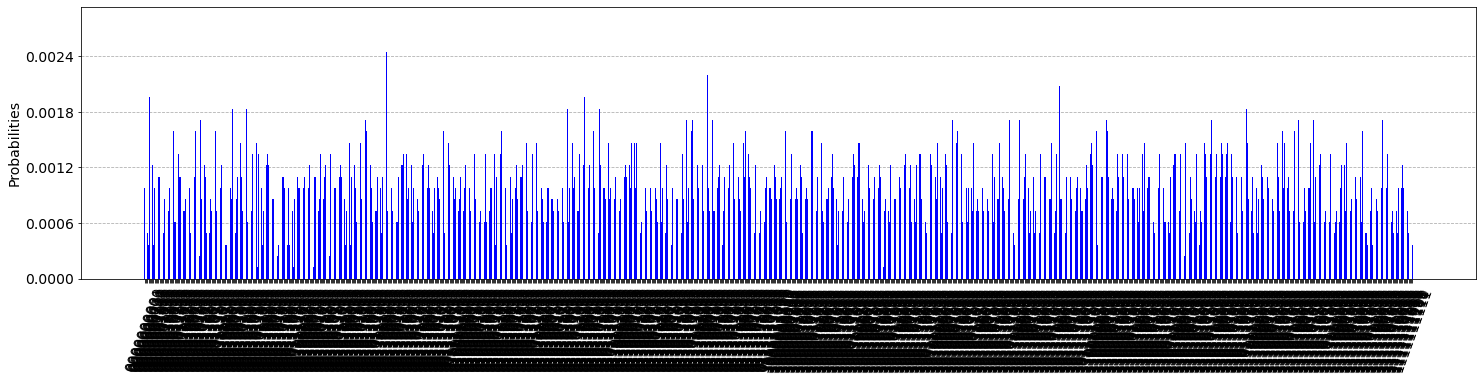

In [85]:
plot_histogram( DADOS_100_teste, bar_labels = False, color='blue', figsize = (25, 5) )

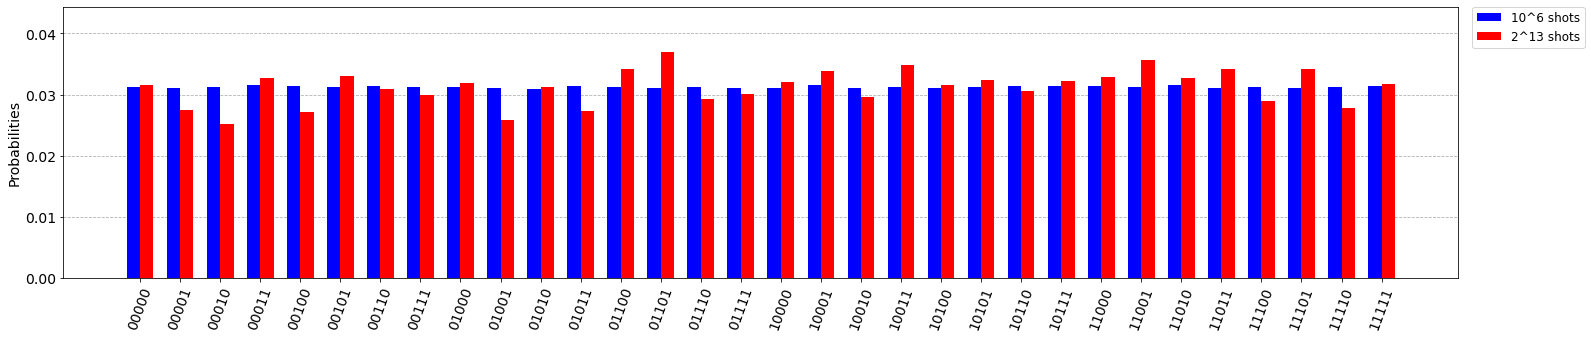

In [86]:
plot_histogram( [DADOS_50, DADOS_50_teste ],legend =['10^6 shots', '2^13 shots'], bar_labels = False, color=['blue', 'red'], figsize = (25, 5) )

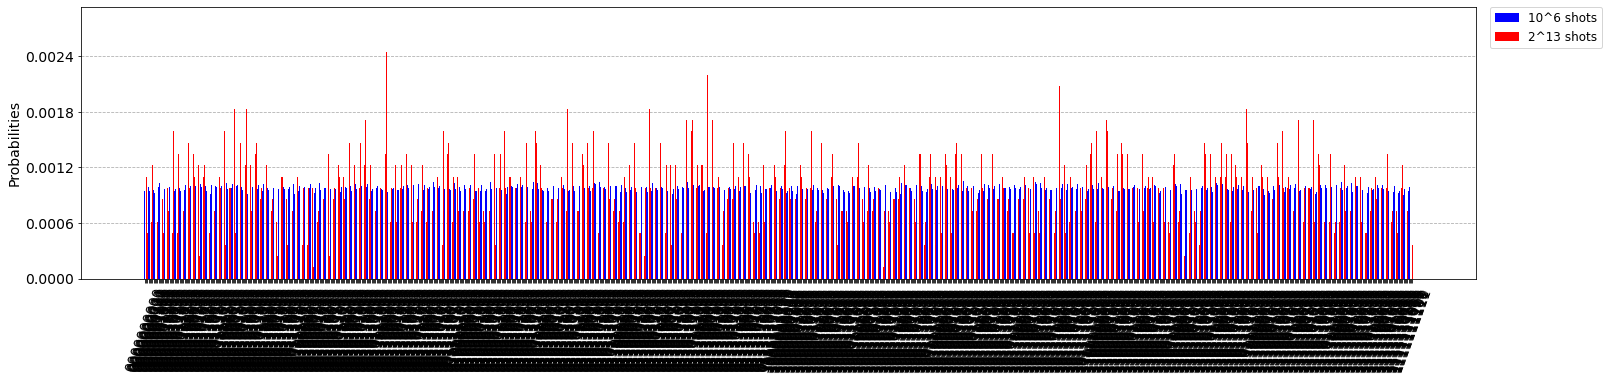

In [87]:
plot_histogram( [DADOS_100, DADOS_100_teste ],legend =['10^6 shots', '2^13 shots'], bar_labels = False, color=['blue', 'red'], figsize = (25, 5) )

In [88]:
#------------------------------------------------------------------------
# TESTES:
#------------------------------------------------------------------------
N_SHOTS = 2**(10)
BACKEND_NAME = "qasm_simulator"

DADOS_50_teste2 = SIMULADOR_LOCAL(QC_QFT_50, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'01000': 30, '10111': 36, '11100': 55, '00010': 31, '01011': 26, '10011': 33, '00011': 32, '00101': 36, '01100': 27, '11011': 32, '11110': 45, '00111': 23, '00001': 36, '01111': 28, '00000': 33, '10010': 33, '01001': 45, '10000': 28, '10100': 35, '00110': 29, '11000': 31, '10101': 33, '10110': 29, '01101': 32, '11001': 24, '10001': 27, '11111': 25, '01110': 30, '11010': 42, '11101': 34, '00100': 21, '01010': 23}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


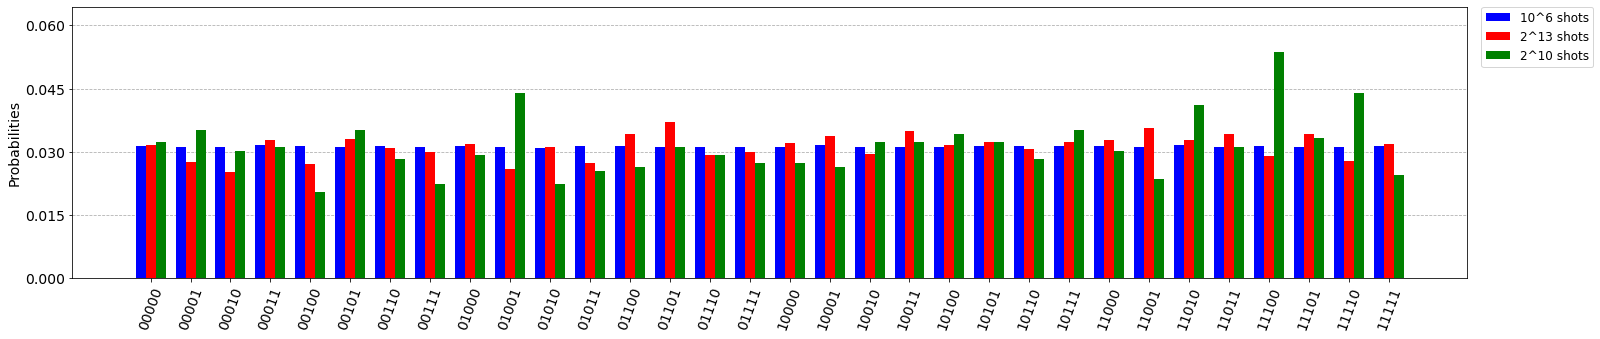

In [89]:
plot_histogram( [DADOS_50, DADOS_50_teste, DADOS_50_teste2 ],legend =['10^6 shots', '2^13 shots', '2^10 shots'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (25, 5) )

## Simulação Remota (computador quântico) <a class="anchor" id="third-bullet"></a>

In [90]:
#-------------------------------------------------
# REGISTRANDO-SE NA IBM:
#------------------------------------------------
# Obs. : esta linha de codigo deve ser executada uma unica vez .
# Caso precise executa−la novamente RESTARTE o KERNEL.
from qiskit import IBMQ
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
# Você pode obter o seu token em:
# https://quantum-computing.ibm.com/
QX_TOKEN = "cole seu token aqui"
QX_URL = "https://quantumexperience.ng.bluemix.net/api"
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
try :
    IBMQ.save_account(QX_TOKEN)
    print('Registado com sucesso!')
except :
    print('Algo deu errado. \nVocê inseriu o token correto?')

configrc.store_credentials:WARNING:2021-09-17 08:43:27,174: Credentials already present. Set overwrite=True to overwrite.


Registado com sucesso!


In [91]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [93]:
from qiskit.tools.monitor import  backend_overview

backend_overview()

ibmq_manila                  ibmq_belem                   ibmq_lima
-----------                  ----------                   ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 28             Pending Jobs: 5              Pending Jobs: 156
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      133.0          Avg. T1:      74.1           Avg. T1:      72.3
Avg. T2:      58.3           Avg. T2:      76.9           Avg. T2:      90.0



ibmq_santiago                ibmq_armonk                  ibmq_bogota
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  1              Num. Qubits:  5
Pending Jobs: 100            Pending Jobs: 4              Pending Jobs: 20
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operat

In [94]:
#--------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA REMOTA:
#--------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    F_NAME = '\'SIMULADOR_REMOTO()\'';
    from qiskit               import IBMQ;
    from qiskit               import execute;
    from qiskit.tools.monitor import job_monitor;
#--------------
    PROVIDER = IBMQ.get_provider();
    BACKEND  = PROVIDER.get_backend(BACKEND_NAME);
#--------------
    STATUS  = BACKEND.status();
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME );
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:');
        print("    STATUS.operational =",  STATUS);
        print(' ENCERRANDO'); return None;
#---------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    job_monitor(EXP, interval = 5);
#---------------
    RESULT = EXP.result();
    print(' RESULTS:');
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
    print('   get_counts():', RESULT.get_counts() ); # print(' get_data() = ',   result.get_data(qc) );
#----------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

In [95]:
# EXECUTANDO O CIRCUITO COM ESTADO INICIAL: 000

# NUMERO DE VEZES EM QUE O CIRCUITO EH EXECUTADO. 2**(13) EH O MAXIMO QUE A IBM ACEITA
N_SHOTS = 2**(13)

# ESCOLHENDO 2 BACKENDS COM FILA DE JOBS PEQUENA (OLHEI ACIMA).

BACKEND_NAME = "ibmq_manila";   DADOS_20_manila   = SIMULADOR_REMOTO(QC_QFT_20, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_20_belem    = SIMULADOR_REMOTO(QC_QFT_20, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'00': 2256, '01': 2004, '10': 1915, '11': 2017}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00': 2273, '01': 1937, '10': 1632, '11': 2350}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


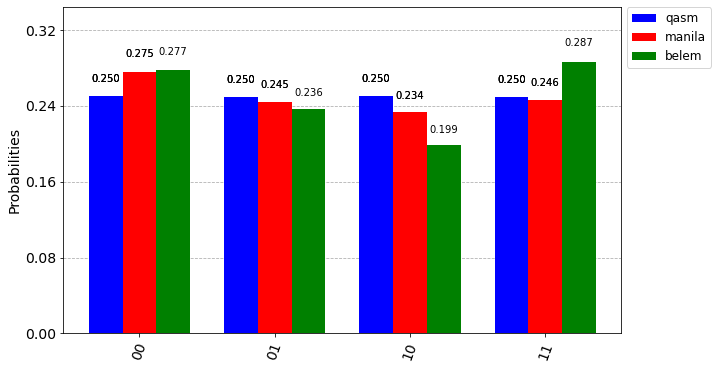

In [96]:
plot_histogram( [DADOS_20, DADOS_20_manila, DADOS_20_belem], legend =['qasm', 'manila', 'belem'], bar_labels = True, color=['blue', 'red', 'green'], figsize = (10, 6) )

In [97]:
BACKEND_NAME = "ibmq_manila";   DADOS_30_manila   = SIMULADOR_REMOTO(QC_QFT_30, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_30_belem    = SIMULADOR_REMOTO(QC_QFT_30, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'000': 1264, '001': 724, '010': 1100, '011': 940, '100': 990, '101': 674, '110': 1437, '111': 1063}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'000': 1193, '001': 1012, '010': 954, '011': 968, '100': 1163, '101': 890, '110': 938, '111': 1074}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [98]:
BACKEND_NAME = "ibmq_manila";   DADOS_31_manila   = SIMULADOR_REMOTO(QC_QFT_31, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_31_belem    = SIMULADOR_REMOTO(QC_QFT_31, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'000': 1210, '001': 1223, '010': 1223, '011': 1046, '100': 1061, '101': 892, '110': 850, '111': 687}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'000': 1045, '001': 1175, '010': 949, '011': 1016, '100': 1094, '101': 944, '110': 1114, '111': 855}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [99]:
BACKEND_NAME = "ibmq_manila";   DADOS_32_manila   = SIMULADOR_REMOTO(QC_QFT_32, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_32_belem    = SIMULADOR_REMOTO(QC_QFT_32, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'000': 6945, '001': 154, '010': 232, '011': 28, '100': 430, '101': 116, '110': 221, '111': 66}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'000': 4972, '001': 527, '010': 249, '011': 157, '100': 1329, '101': 352, '110': 464, '111': 142}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [100]:
BACKEND_NAME = "ibmq_manila";   DADOS_33_manila   = SIMULADOR_REMOTO(QC_QFT_33, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_33_belem    = SIMULADOR_REMOTO(QC_QFT_33, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'000': 1677, '001': 1448, '010': 1219, '011': 581, '100': 542, '101': 679, '110': 726, '111': 1320}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'000': 1399, '001': 1324, '010': 1249, '011': 1437, '100': 893, '101': 654, '110': 574, '111': 662}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [101]:
BACKEND_NAME = "ibmq_manila";   DADOS_34_manila   = SIMULADOR_REMOTO(QC_QFT_34, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_34_belem    = SIMULADOR_REMOTO(QC_QFT_34, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'000': 911, '001': 848, '010': 1044, '011': 587, '100': 486, '101': 992, '110': 1613, '111': 1711}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'000': 1431, '001': 984, '010': 820, '011': 771, '100': 1178, '101': 878, '110': 1295, '111': 835}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [102]:
BACKEND_NAME = "ibmq_manila";   DADOS_40_manila   = SIMULADOR_REMOTO(QC_QFT_40, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_40_belem    = SIMULADOR_REMOTO(QC_QFT_40, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'0000': 631, '0001': 656, '0010': 483, '0011': 447, '0100': 588, '0101': 430, '0110': 487, '0111': 324, '1000': 750, '1001': 449, '1010': 528, '1011': 384, '1100': 646, '1101': 456, '1110': 530, '1111': 403}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'0000': 774, '0001': 595, '0010': 725, '0011': 477, '0100': 631, '0101': 483, '0110': 599, '0111': 446, '1000': 544, '1001': 455, '1010': 483, '1011': 379, '1100': 484, '1101': 379, '1110': 415, '1111': 323}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [103]:
BACKEND_NAME = "ibmq_manila";   DADOS_41_manila   = SIMULADOR_REMOTO(QC_QFT_41, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_41_belem    = SIMULADOR_REMOTO(QC_QFT_41, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'0000': 756, '0001': 393, '0010': 666, '0011': 388, '0100': 785, '0101': 417, '0110': 569, '0111': 349, '1000': 806, '1001': 468, '1010': 609, '1011': 352, '1100': 621, '1101': 322, '1110': 438, '1111': 253}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'0000': 816, '0001': 591, '0010': 576, '0011': 484, '0100': 702, '0101': 546, '0110': 500, '0111': 445, '1000': 607, '1001': 484, '1010': 405, '1011': 377, '1100': 524, '1101': 412, '1110': 385, '1111': 338}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [104]:
BACKEND_NAME = "ibmq_manila";   DADOS_42_manila   = SIMULADOR_REMOTO(QC_QFT_42, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_42_belem    = SIMULADOR_REMOTO(QC_QFT_42, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'0000': 2268, '0001': 171, '0010': 236, '0011': 32, '0100': 835, '0101': 81, '0110': 371, '0111': 73, '1000': 1914, '1001': 263, '1010': 207, '1011': 35, '1100': 1025, '1101': 130, '1110': 469, '1111': 82}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'0000': 1570, '0001': 456, '0010': 575, '0011': 324, '0100': 566, '0101': 320, '0110': 508, '0111': 278, '1000': 874, '1001': 357, '1010': 492, '1011': 292, '1100': 504, '1101': 316, '1110': 511, '1111': 249}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [105]:
BACKEND_NAME = "ibmq_manila";   DADOS_43_manila   = SIMULADOR_REMOTO(QC_QFT_43, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_43_belem    = SIMULADOR_REMOTO(QC_QFT_43, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'0000': 650, '0001': 724, '0010': 424, '0011': 585, '0100': 515, '0101': 598, '0110': 377, '0111': 423, '1000': 455, '1001': 437, '1010': 375, '1011': 441, '1100': 498, '1101': 678, '1110': 428, '1111': 584}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'0000': 730, '0001': 633, '0010': 523, '0011': 495, '0100': 534, '0101': 547, '0110': 378, '0111': 442, '1000': 626, '1001': 670, '1010': 517, '1011': 559, '1100': 464, '1101': 418, '1110': 345, '1111': 311}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [106]:
BACKEND_NAME = "ibmq_manila";   DADOS_44_manila   = SIMULADOR_REMOTO(QC_QFT_44, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_44_belem    = SIMULADOR_REMOTO(QC_QFT_44, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'0000': 667, '0001': 526, '0010': 540, '0011': 550, '0100': 534, '0101': 411, '0110': 604, '0111': 449, '1000': 595, '1001': 451, '1010': 509, '1011': 403, '1100': 488, '1101': 390, '1110': 560, '1111': 515}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'0000': 1026, '0001': 524, '0010': 654, '0011': 388, '0100': 828, '0101': 441, '0110': 546, '0111': 306, '1000': 638, '1001': 413, '1010': 457, '1011': 308, '1100': 606, '1101': 395, '1110': 387, '1111': 275}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


In [107]:
BACKEND_NAME = "ibmq_manila";   DADOS_50_manila   = SIMULADOR_REMOTO(QC_QFT_50, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_50_belem    = SIMULADOR_REMOTO(QC_QFT_50, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'00000': 398, '00001': 252, '10000': 465, '10001': 215, '10010': 342, '10011': 186, '10100': 407, '10101': 179, '10110': 261, '10111': 185, '11000': 406, '11001': 180, '11010': 306, '11011': 164, '11100': 323, '11101': 152, '11110': 278, '11111': 209, '00010': 291, '00011': 232, '00100': 335, '00101': 241, '00110': 241, '00111': 221, '01000': 271, '01001': 197, '01010': 237, '01011': 174, '01100': 232, '01101': 172, '01110': 243, '01111': 197}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00000': 605, '00001': 526, '10000': 595, '10001': 574, '10010': 381, '10011': 339, '10100': 208, '10101': 200, '10110': 145, '10111': 134, '11000': 375, '11001': 300, '11010': 216, '11011': 192, '11100'

In [108]:
BACKEND_NAME = "ibmq_manila";   DADOS_51_manila   = SIMULADOR_REMOTO(QC_QFT_51, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_51_belem    = SIMULADOR_REMOTO(QC_QFT_51, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'00000': 400, '00001': 295, '10000': 323, '10001': 253, '10010': 282, '10011': 195, '10100': 254, '10101': 184, '10110': 253, '10111': 151, '11000': 346, '11001': 257, '11010': 324, '11011': 244, '11100': 218, '11101': 157, '11110': 243, '11111': 180, '00010': 360, '00011': 259, '00100': 309, '00101': 195, '00110': 354, '00111': 198, '01000': 358, '01001': 215, '01010': 363, '01011': 240, '01100': 220, '01101': 147, '01110': 268, '01111': 147}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00000': 601, '00001': 568, '10000': 563, '10001': 536, '10010': 223, '10011': 217, '10100': 458, '10101': 437, '10110': 202, '10111': 193, '11000': 236, '11001': 222, '11010': 111, '11011': 102, '11100'

In [109]:
BACKEND_NAME = "ibmq_manila";   DADOS_51_manila   = SIMULADOR_REMOTO(QC_QFT_51, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_51_belem    = SIMULADOR_REMOTO(QC_QFT_51, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'00000': 368, '00001': 262, '10000': 410, '10001': 328, '10010': 364, '10011': 245, '10100': 320, '10101': 252, '10110': 246, '10111': 181, '11000': 283, '11001': 207, '11010': 229, '11011': 210, '11100': 197, '11101': 165, '11110': 208, '11111': 139, '00010': 315, '00011': 229, '00100': 300, '00101': 218, '00110': 227, '00111': 164, '01000': 360, '01001': 243, '01010': 336, '01011': 220, '01100': 312, '01101': 233, '01110': 234, '01111': 187}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00000': 469, '00001': 266, '10000': 292, '10001': 168, '10010': 317, '10011': 186, '10100': 243, '10101': 139, '10110': 226, '10111': 175, '11000': 309, '11001': 183, '11010': 300, '11011': 199, '11100'

In [110]:
BACKEND_NAME = "ibmq_manila";   DADOS_52_manila   = SIMULADOR_REMOTO(QC_QFT_52, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_52_belem    = SIMULADOR_REMOTO(QC_QFT_52, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'00000': 862, '00001': 89, '10000': 544, '10001': 100, '10010': 322, '10011': 71, '10100': 482, '10101': 78, '10110': 278, '10111': 59, '11000': 787, '11001': 93, '11010': 453, '11011': 71, '11100': 758, '11101': 110, '11110': 410, '11111': 52, '00010': 350, '00011': 47, '00100': 340, '00101': 57, '00110': 227, '00111': 23, '01000': 461, '01001': 66, '01010': 251, '01011': 75, '01100': 295, '01101': 75, '01110': 256, '01111': 50}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00000': 454, '00001': 127, '10000': 482, '10001': 119, '10010': 365, '10011': 108, '10100': 454, '10101': 110, '10110': 386, '10111': 109, '11000': 471, '11001': 105, '11010': 346, '11011': 121, '11100': 354, '11101'

In [111]:
BACKEND_NAME = "ibmq_manila";   DADOS_53_manila   = SIMULADOR_REMOTO(QC_QFT_53, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_53_belem    = SIMULADOR_REMOTO(QC_QFT_53, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_manila |   status: Successful completion |   success: True
   get_counts(): {'00000': 364, '00001': 277, '10000': 266, '10001': 267, '10010': 246, '10011': 207, '10100': 290, '10101': 265, '10110': 185, '10111': 190, '11000': 295, '11001': 246, '11010': 237, '11011': 210, '11100': 290, '11101': 223, '11110': 280, '11111': 213, '00010': 327, '00011': 249, '00100': 302, '00101': 273, '00110': 239, '00111': 223, '01000': 294, '01001': 241, '01010': 272, '01011': 198, '01100': 297, '01101': 267, '01110': 236, '01111': 223}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00000': 316, '00001': 327, '10000': 338, '10001': 334, '10010': 218, '10011': 262, '10100': 291, '10101': 316, '10110': 216, '10111': 236, '11000': 325, '11001': 311, '11010': 200, '11011': 223, '11100'

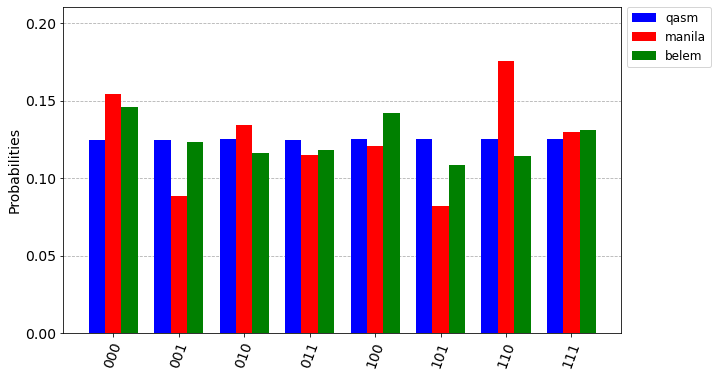

In [112]:
plot_histogram( [DADOS_30, DADOS_30_manila, DADOS_30_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

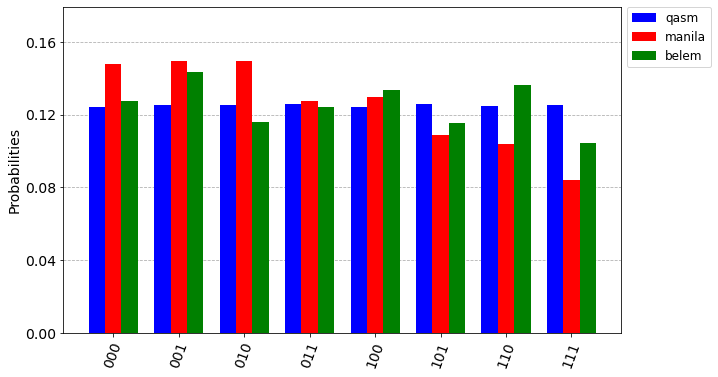

In [113]:
plot_histogram( [DADOS_31, DADOS_31_manila, DADOS_31_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

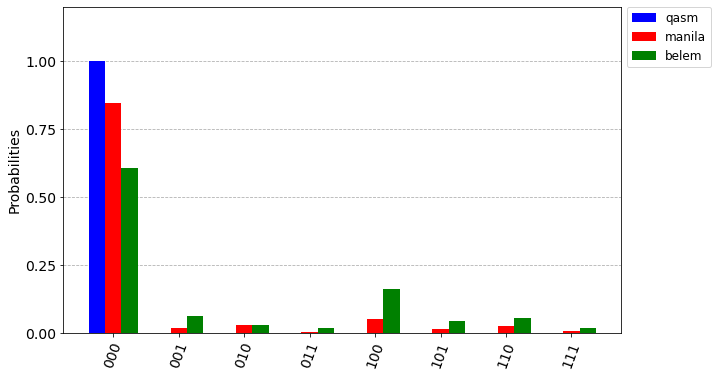

In [114]:
plot_histogram( [DADOS_32, DADOS_32_manila, DADOS_32_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

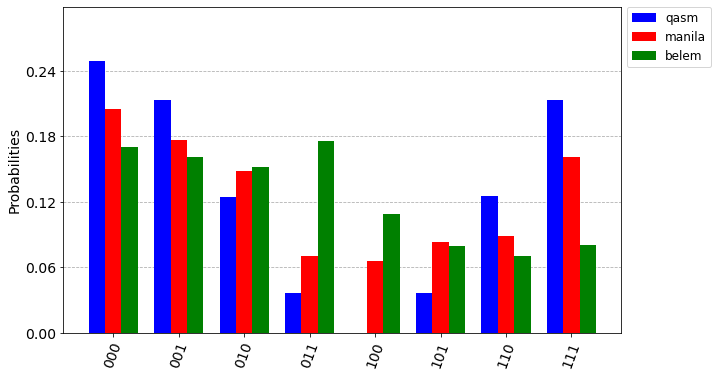

In [115]:
plot_histogram( [DADOS_33, DADOS_33_manila, DADOS_33_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

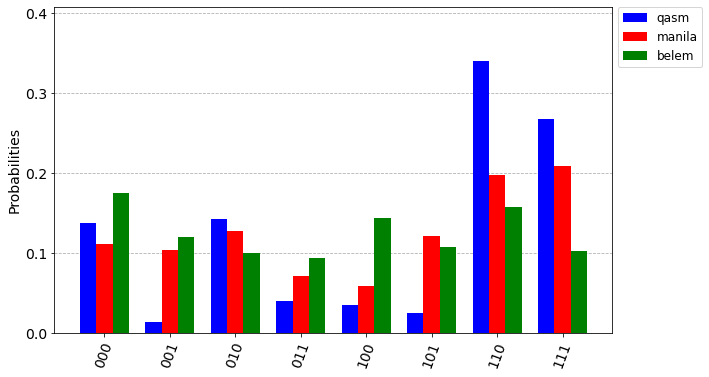

In [116]:
plot_histogram( [DADOS_34, DADOS_34_manila, DADOS_34_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

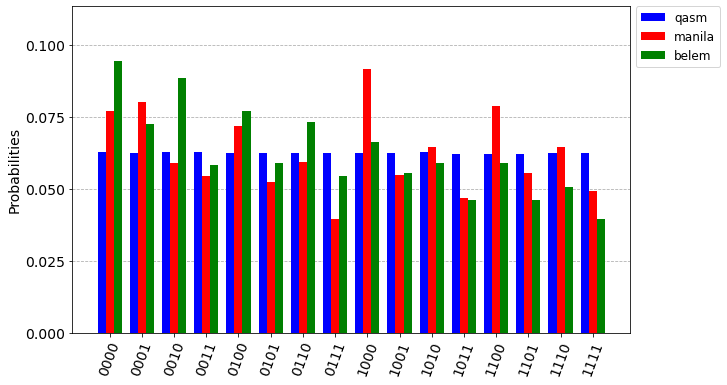

In [117]:
plot_histogram( [DADOS_40, DADOS_40_manila, DADOS_40_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

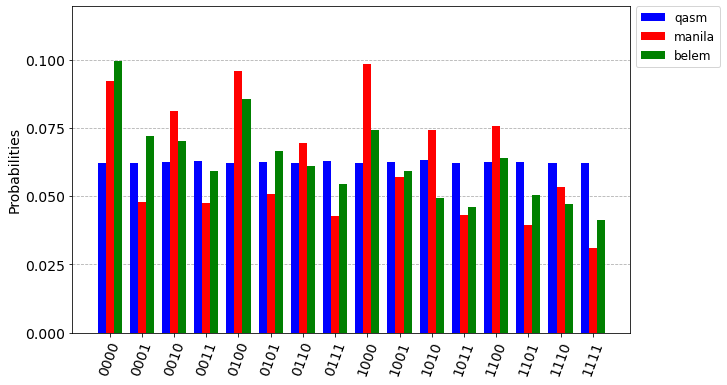

In [118]:
plot_histogram( [DADOS_41, DADOS_41_manila, DADOS_41_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

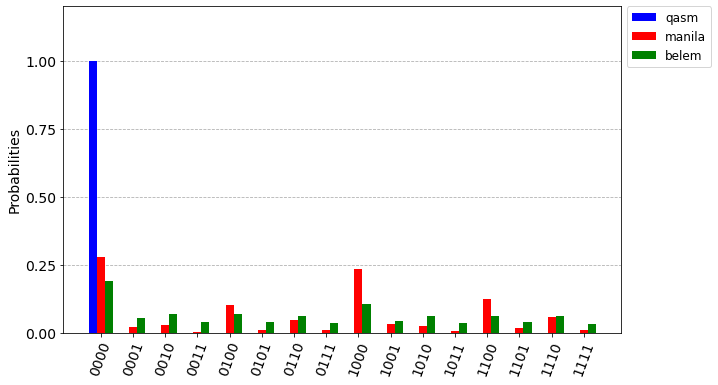

In [119]:
plot_histogram( [DADOS_42, DADOS_42_manila, DADOS_42_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

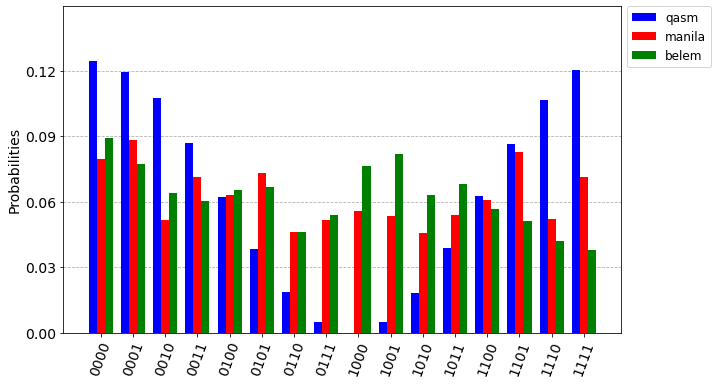

In [120]:
plot_histogram( [DADOS_43, DADOS_43_manila, DADOS_43_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

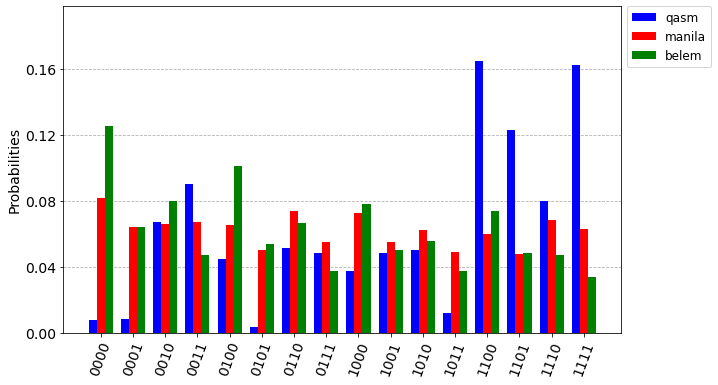

In [121]:
plot_histogram( [DADOS_44, DADOS_44_manila, DADOS_44_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

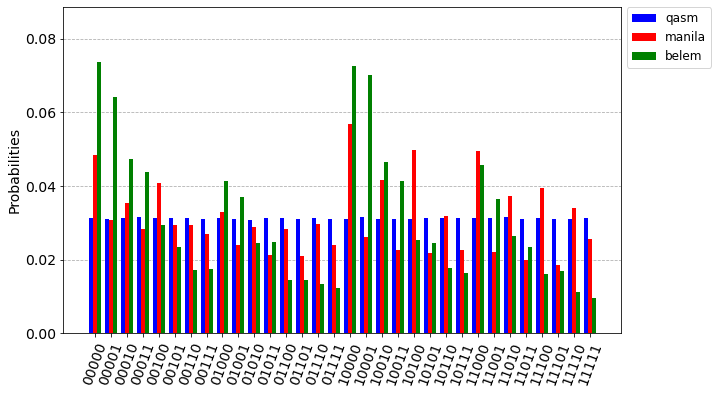

In [122]:
plot_histogram( [DADOS_50, DADOS_50_manila, DADOS_50_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

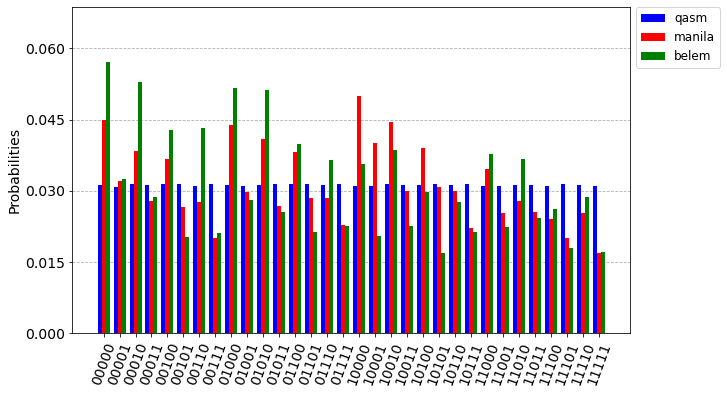

In [123]:
plot_histogram( [DADOS_51, DADOS_51_manila, DADOS_51_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

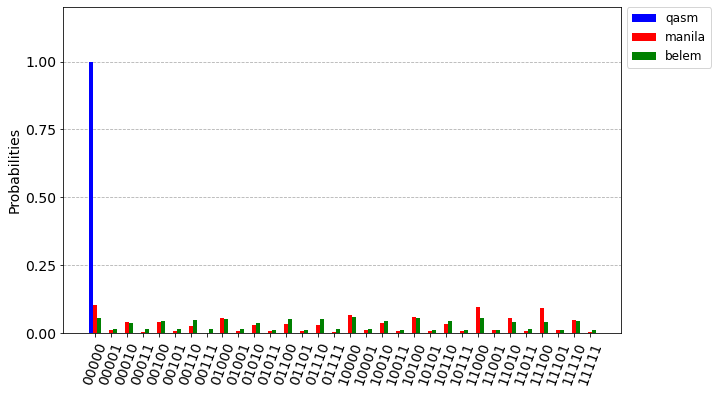

In [124]:
plot_histogram( [DADOS_52, DADOS_52_manila, DADOS_52_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

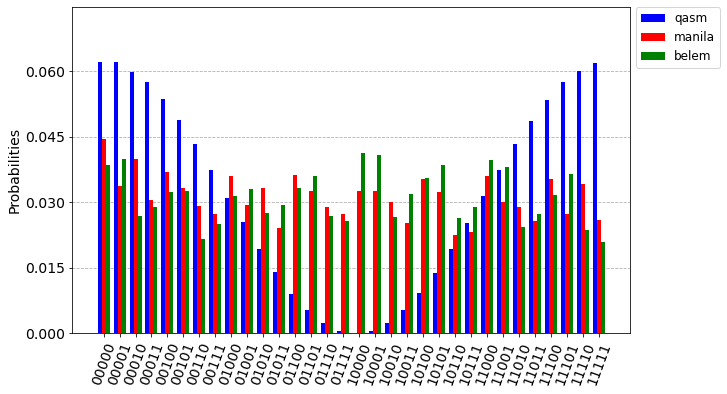

In [125]:
plot_histogram( [DADOS_53, DADOS_53_manila, DADOS_53_belem], legend =['qasm', 'manila', 'belem'], bar_labels = False, color=['blue', 'red', 'green'], figsize = (10, 6) )

### Calculando a fidelidade de Hellinger

#### Computes the Hellinger fidelity between two counts distributions.

##### Referência: https://qiskit.org/documentation/stubs/qiskit.quantum_info.hellinger_fidelity.html

In [127]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.quantum_info.analysis import hellinger_fidelity

hellinger_fidelity(DADOS_20, DADOS_20_manila)

0.9990718500641411

In [128]:
hellinger_fidelity(DADOS_20, DADOS_20_belem)

0.9949245588064048

In [143]:
print("Máquina \t\t Estado inicial \t\t Fidelidade de Hellinger")
print("----------------------------------------------------------------------------------")
print("ibmq_manila \t\t |00> \t\t\t\t", hellinger_fidelity(DADOS_20, DADOS_20_manila))
print("ibmq_belem  \t\t |00> \t\t\t\t",hellinger_fidelity(DADOS_20, DADOS_20_belem))

Máquina 		 Estado inicial 		 Fidelidade de Hellinger
----------------------------------------------------------------------------------
ibmq_manila 		 |00> 				 0.9990718500641411
ibmq_belem  		 |00> 				 0.9949245588064048


In [149]:
print("Máquina \t\t Estado inicial \t\t Fidelidade de Hellinger")
print("----------------------------------------------------------------------------------")
print("ibmq_manila \t\t |000>       \t\t\t\t", hellinger_fidelity(DADOS_30, DADOS_30_manila))
print("ibmq_belem  \t\t |000>       \t\t\t\t", hellinger_fidelity(DADOS_30, DADOS_30_belem))
print("ibmq_manila \t\t |111>       \t\t\t\t", hellinger_fidelity(DADOS_31, DADOS_31_manila))
print("ibmq_belem  \t\t |111>       \t\t\t\t", hellinger_fidelity(DADOS_31, DADOS_31_belem))
print("ibmq_manila \t\t (|0>+|1>)_3 \t\t\t\t", hellinger_fidelity(DADOS_32, DADOS_32_manila))
print("ibmq_belem  \t\t (|0>+|1>)_3 \t\t\t\t", hellinger_fidelity(DADOS_32, DADOS_32_belem))
print("ibmq_manila \t\t |0>_3+|1>_3 \t\t\t\t", hellinger_fidelity(DADOS_33, DADOS_33_manila))
print("ibmq_belem  \t\t |0>_3+|1>_3 \t\t\t\t", hellinger_fidelity(DADOS_33, DADOS_33_belem))
print("ibmq_manila \t\t Aleatório   \t\t\t\t", hellinger_fidelity(DADOS_34, DADOS_34_manila))
print("ibmq_belem  \t\t Aleatório   \t\t\t\t", hellinger_fidelity(DADOS_34, DADOS_34_belem))

Máquina 		 Estado inicial 		 Fidelidade de Hellinger
----------------------------------------------------------------------------------
ibmq_manila 		 |000>       				 0.9862279149652325
ibmq_belem  		 |000>       				 0.9975321860588268
ibmq_manila 		 |111>       				 0.9912105949205604
ibmq_belem  		 |111>       				 0.9975890810890303
ibmq_manila 		 (|0>+|1>)_3 				 0.8477783203125001
ibmq_belem  		 (|0>+|1>)_3 				 0.60693359375
ibmq_manila 		 |0>_3+|1>_3 				 0.9095099018640217
ibmq_belem  		 |0>_3+|1>_3 				 0.7916715718705665
ibmq_manila 		 Aleatório   				 0.892584393582517
ibmq_belem  		 Aleatório   				 0.8014609122077808


In [150]:
print("Máquina \t\t Estado inicial \t\t Fidelidade de Hellinger")
print("----------------------------------------------------------------------------------")
print("ibmq_manila \t\t |0000>       \t\t\t\t", hellinger_fidelity(DADOS_40, DADOS_40_manila))
print("ibmq_belem  \t\t |0000>       \t\t\t\t", hellinger_fidelity(DADOS_40, DADOS_40_belem))
print("ibmq_manila \t\t |1111>       \t\t\t\t", hellinger_fidelity(DADOS_41, DADOS_41_manila))
print("ibmq_belem  \t\t |1111>       \t\t\t\t", hellinger_fidelity(DADOS_41, DADOS_41_belem))
print("ibmq_manila \t\t (|0>+|1>)_4  \t\t\t\t", hellinger_fidelity(DADOS_42, DADOS_42_manila))
print("ibmq_belem  \t\t (|0>+|1>)_4  \t\t\t\t", hellinger_fidelity(DADOS_42, DADOS_42_belem))
print("ibmq_manila \t\t |0>_4+|1>_4  \t\t\t\t", hellinger_fidelity(DADOS_43, DADOS_43_manila))
print("ibmq_belem  \t\t |0>_4+|1>_4  \t\t\t\t", hellinger_fidelity(DADOS_43, DADOS_43_belem))
print("ibmq_manila \t\t Aleatório    \t\t\t\t", hellinger_fidelity(DADOS_44, DADOS_44_manila))
print("ibmq_belem  \t\t Aleatório    \t\t\t\t", hellinger_fidelity(DADOS_44, DADOS_44_belem))

Máquina 		 Estado inicial 		 Fidelidade de Hellinger
----------------------------------------------------------------------------------
ibmq_manila 		 |0000>       				 0.9883626346239534
ibmq_belem  		 |0000>       				 0.986660877477764
ibmq_manila 		 |1111>       				 0.9721318450565922
ibmq_belem  		 |1111>       				 0.9862937091153547
ibmq_manila 		 (|0>+|1>)_4  				 0.2768554687500001
ibmq_belem  		 (|0>+|1>)_4  				 0.19165039062500006
ibmq_manila 		 |0>_4+|1>_4  				 0.8461319112853799
ibmq_belem  		 |0>_4+|1>_4  				 0.7777157392462326
ibmq_manila 		 Aleatório    				 0.8245746728359384
ibmq_belem  		 Aleatório    				 0.7669164831036506


In [152]:
print("Máquina \t\t Estado inicial \t\t Fidelidade de Hellinger")
print("----------------------------------------------------------------------------------")
print("ibmq_manila \t\t |00000>       \t\t\t\t", hellinger_fidelity(DADOS_50, DADOS_50_manila))
print("ibmq_belem  \t\t |00000>       \t\t\t\t", hellinger_fidelity(DADOS_50, DADOS_50_belem))
print("ibmq_manila \t\t |11111>       \t\t\t\t", hellinger_fidelity(DADOS_51, DADOS_51_manila))
print("ibmq_belem  \t\t |11111>       \t\t\t\t", hellinger_fidelity(DADOS_51, DADOS_51_belem))
print("ibmq_manila \t\t (|0>+|1>)_5   \t\t\t\t", hellinger_fidelity(DADOS_52, DADOS_52_manila))
print("ibmq_belem  \t\t (|0>+|1>)_5   \t\t\t\t", hellinger_fidelity(DADOS_52, DADOS_52_belem))
print("ibmq_manila \t\t |0>_5+|1>_5   \t\t\t\t", hellinger_fidelity(DADOS_53, DADOS_53_manila))
print("ibmq_belem  \t\t |0>_5+|1>_5   \t\t\t\t", hellinger_fidelity(DADOS_53, DADOS_53_belem))

Máquina 		 Estado inicial 		 Fidelidade de Hellinger
----------------------------------------------------------------------------------
ibmq_manila 		 |00000>       				 0.978076407820207
ibmq_belem  		 |00000>       				 0.9214783434377463
ibmq_manila 		 |11111>       				 0.9834039633008503
ibmq_belem  		 |11111>       				 0.970091010575498
ibmq_manila 		 (|0>+|1>)_5   				 0.10522460937500007
ibmq_belem  		 (|0>+|1>)_5   				 0.055419921875000104
ibmq_manila 		 |0>_5+|1>_5   				 0.8167753188045194
ibmq_belem  		 |0>_5+|1>_5   				 0.7869232914413389


## QFT inversa <a class="anchor" id="fourth-bullet"></a>

In [157]:
# Definindo a Função que Calcula a QFT e a QFT Inversa - '2' Qubits
#-----------------------------------------------------
def QFT_QFT_INV(Changing_initial_state):
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
#------------------------------
    Q  = QuantumRegister(  2, name = 'j')
    C  = ClassicalRegister(2, name = 'c')
    QC = QuantumCircuit(Q, C, name = "QFT_QFT_INV")
#------------------------------
#PREPARAÇÃO DO ESTADO INCIAL
#------------------------------     
    if Changing_initial_state == 0: # |00>
        None
    if Changing_initial_state == 1: # |01>
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 2: # |10>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.barrier()
    if Changing_initial_state == 3: # |11>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.barrier()
#------------------------------
    if Changing_initial_state == 4: # |0>|+>
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 5: # |+>|0>
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.barrier()
    if Changing_initial_state == 6: # |0>|->
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 7: # |->|0>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.barrier()
#------------------------------
    if Changing_initial_state == 8: # |1>|+>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 9: # |+>|1>
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 10: # |1>|->
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 11: # |->|1>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.barrier()
#------------------------------
    if Changing_initial_state == 12: # |+>|+>
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 13: # |+>|->
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 14: # |->|+>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
    if Changing_initial_state == 15: # |->|->
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.h(Q[1]) # <-- PORTA 'H' NO QUBIT 1
        QC.barrier()
#------------------------------
    if Changing_initial_state == 16: # |00> + |11>
        QC.h(Q[0])
        QC.cx(Q[0], Q[1])
        QC.barrier()
    if Changing_initial_state == 17: # |01> + |10>
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.h(Q[0])
        QC.cx(Q[0], Q[1])
        QC.barrier()
    if Changing_initial_state == 18: # |10> - |11>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.h(Q[0])
        QC.cx(Q[0], Q[1])
        QC.barrier()
    if Changing_initial_state == 19: # |01> + |10>
        QC.x(Q[0]) # <-- PORTA 'X' NO QUBIT 0
        QC.x(Q[1]) # <-- PORTA 'X' NO QUBIT 1
        QC.h(Q[0])
        QC.cx(Q[0], Q[1])
        QC.barrier()
    
#------------------------------
# QFT DIRETA
#------------------------------
    QC.h(Q[1])  # <-- PORTA 'H' NO QUBIT 1
    Rk(QC, Q[0], Q[1], 2, 1.0)
    QC.barrier()
#------------------------------
    QC.h(Q[0])  # <-- PORTA 'H' NO QUBIT 0
    QC.barrier()
#------------------------------
# PORTA SWAP:
#------------------------------
    QC.swap( Q[0], Q[1] )
#------------------------------
# QFT INVERSA PARA n=2 QBITS:
#------------------------------
    QC.barrier()
#------------------------------
    QC.swap(Q[0], Q[1])
    QC.h(Q[0])
    Rk(QC, Q[0], Q[1], 2, -1.0)
    QC.h(Q[1])
#------------------------------
    QC.barrier()
    QC.measure(Q, C)
    print('QFT_QFT_INV(): FUNCIONA')
#------------------------------
    return QC

QFT_QFT_INV(): FUNCIONA


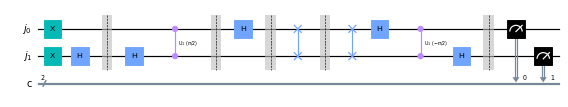

In [160]:
QC = QFT_QFT_INV(10);
display( QC.draw(output='mpl', scale = 0.60) )

In [162]:
#------------------------------------------------------------------------
# SIMULANDO O CIRCUITO:
#------------------------------------------------------------------------
N_SHOTS = 10**(6)
BACKEND_NAME = "qasm_simulator"

DADOS = SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'01': 499652, '11': 500348}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


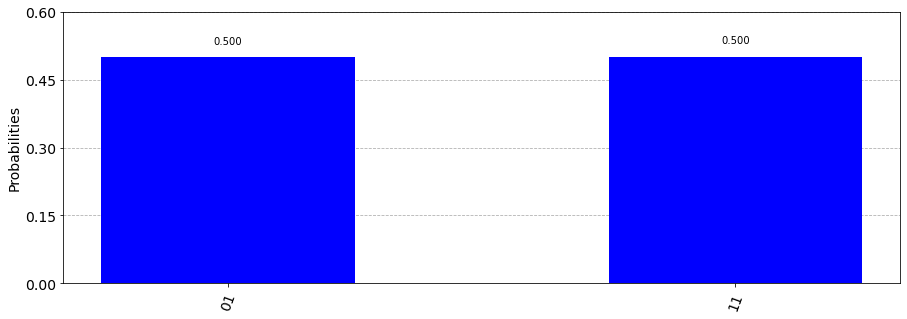

In [163]:
plot_histogram( DADOS, bar_labels = True, color='blue', figsize = (15, 5) )

In [165]:
N_SHOTS = 2**(13)
BACKEND_NAME = "ibmq_belem"
DADOS_belem = SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME)

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'00': 519, '01': 3894, '10': 999, '11': 2780}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


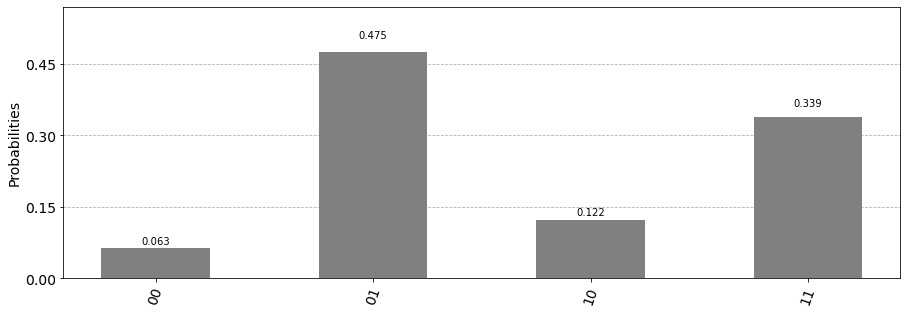

In [166]:
plot_histogram( DADOS_belem, bar_labels = True, color='gray', figsize = (15, 5) )

In [169]:
hellinger_fidelity(DADOS, DADOS_belem)

0.8089351728760803

In [168]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\warle\anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
